In [1]:
import os
import numpy as np
from matplotlib import pyplot as plt
from mpl_toolkits.axes_grid1 import make_axes_locatable

import json
import loadlib
from evaluate_model import *

%load_ext autoreload
%autoreload 2

Using TensorFlow backend.


In [2]:
params = {'legend.fontsize': 'x-large',
         'axes.labelsize': 'x-large',
         'axes.titlesize':'x-large',
         'xtick.labelsize':'x-large',
         'ytick.labelsize':'x-large'}
plt.rcParams.update(params)

### Evaluating Kitti Road Detection with LoDNN

In [3]:
path = '../../'

In [4]:
models_basedir = '../output/experiment0/'
models_list = sorted(os.listdir(models_basedir))
lodnn_weights_dict = {}
for m in models_list:
    if 'lodnn' in m:
        with open(os.path.join(models_basedir, m, 'details.json'), 'r') as f:
            details = json.load(f)
        testname = details['test_name'].lower()
        lodnn_weights_dict[testname] = os.path.join(models_basedir, m, 'model/best_model.h5')
        
print(lodnn_weights_dict)

{'classical_subsampled_32': '../output/experiment0/lodnn_2019_12_09_15_13/model/best_model.h5', 'classical': '../output/experiment0/lodnn_2019_12_04_12_47/model/best_model.h5', 'classical_eigen': '../output/experiment0/lodnn_2019_12_06_12_06/model/best_model.h5', 'classical_geometric_eigen': '../output/experiment0/lodnn_2019_12_06_13_28/model/best_model.h5', 'classical_geometric': '../output/experiment0/lodnn_2019_12_06_14_51/model/best_model.h5', 'classical_geometric_subsampled_32': '../output/experiment0/lodnn_2019_12_09_16_05/model/best_model.h5', 'classical_eigen_subsampled_32': '../output/experiment0/lodnn_2019_12_09_16_48/model/best_model.h5', 'classical_geometric_eigen_subsampled_32': '../output/experiment0/lodnn_2019_12_09_17_46/model/best_model.h5'}


In [5]:
prec_scores = {}
recall_scores = {}
avg_prec = {}
for k in lodnn_weights_dict:
    exp = Experiment(path,weights=lodnn_weights_dict[k], model_name='lodnn', view='bev', dataset='kitti')
    f_test, gt_test = exp.KPC.load_dataset(set_type='test')
    pred, times = exp.run_pred(f_test)
    avg_prec[k] = exp.average_precision_score(gt_test, pred)
    prec, recall = exp.precision_recall_curve(gt_test, pred)
    prec_scores[k] = prec
    recall_scores[k] = recall

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, None, None, 32)    1760      
_________________________________________________________________
conv2d_2 (Conv2D)            (None, None, None, 32)    9248      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, None, None, 32)    0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, None, None, 128)   36992     
_________________________________________________________________
spatial_dropout2d_1 (Spatial (None, None, None, 128)   0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, None, None, 128)   147584    
_________________________________________________________________
spatial_dropout2d_2 (Spatial (None, None, None, 128)   0         
__________

100%|██████████| 30/30 [00:00<00:00, 1549.73it/s]

nCPUs = 8


nCPUs = 8
nCPUs = 8
nCPUs = 8
nCPUs = 8
Elapsed time to exectute predict_sample: 0.6756730079650879
Elapsed time to exectute predict_sample: 0.4897139072418213
Elapsed time to exectute predict_sample: 0.4999961853027344
Elapsed time to exectute predict_sample: 0.5158777236938477
Elapsed time to exectute predict_sample: 0.4948084354400635
Elapsed time to exectute predict_sample: 0.4783778190612793
Elapsed time to exectute predict_sample: 0.47451329231262207
Elapsed time to exectute predict_sample: 0.46521973609924316
Elapsed time to exectute predict_sample: 0.4715464115142822
Elapsed time to exectute predict_sample: 0.4674217700958252
Elapsed time to exectute predict_sample: 0.468048095703125
Elapsed time to exectute predict_sample: 0.48531436920166016
Elapsed time to exectute predict_sample: 0.4825122356414795
Elapsed time to exectute predict_sample: 0.48387980461120605
Elapsed time to exectute predict_sample: 0.4939863681793213
Elapsed time to exectute predict_sample: 0.51385688781738

100%|██████████| 30/30 [00:00<00:00, 2984.70it/s]

Loading dataset
nCPUs = 8


nCPUs = 8
nCPUs = 8
nCPUs = 8
Elapsed time to exectute predict_sample: 0.7233757972717285
Elapsed time to exectute predict_sample: 0.497952938079834
Elapsed time to exectute predict_sample: 0.49596071243286133
Elapsed time to exectute predict_sample: 0.5080344676971436
Elapsed time to exectute predict_sample: 0.4886143207550049
Elapsed time to exectute predict_sample: 0.48274803161621094
Elapsed time to exectute predict_sample: 0.4898381233215332
Elapsed time to exectute predict_sample: 0.5009486675262451
Elapsed time to exectute predict_sample: 0.49780797958374023
Elapsed time to exectute predict_sample: 0.5054199695587158
Elapsed time to exectute predict_sample: 0.5051672458648682
Elapsed time to exectute predict_sample: 0.5021445751190186
Elapsed time to exectute predict_sample: 0.49227118492126465
Elapsed time to exectute predict_sample: 0.4918549060821533
Elapsed time to exectute predict_sample: 0.49616312980651855
Elapsed time to exectute predict_sample: 0.5004479885101318
Elapse

100%|██████████| 30/30 [00:00<00:00, 3663.04it/s]

Loading dataset
nCPUs = 8


nCPUs = 8
nCPUs = 8
nCPUs = 8
Elapsed time to exectute predict_sample: 0.7614984512329102
Elapsed time to exectute predict_sample: 0.5315163135528564
Elapsed time to exectute predict_sample: 0.5238614082336426
Elapsed time to exectute predict_sample: 0.524308443069458
Elapsed time to exectute predict_sample: 0.522106409072876
Elapsed time to exectute predict_sample: 0.5202183723449707
Elapsed time to exectute predict_sample: 0.5194578170776367
Elapsed time to exectute predict_sample: 0.5191249847412109
Elapsed time to exectute predict_sample: 0.520517110824585
Elapsed time to exectute predict_sample: 0.5161693096160889
Elapsed time to exectute predict_sample: 0.5149185657501221
Elapsed time to exectute predict_sample: 0.5129897594451904
Elapsed time to exectute predict_sample: 0.5217676162719727
Elapsed time to exectute predict_sample: 0.52510666847229
Elapsed time to exectute predict_sample: 0.5218517780303955
Elapsed time to exectute predict_sample: 0.5216531753540039
Elapsed time to

100%|██████████| 30/30 [00:00<00:00, 3611.11it/s]

Loading dataset
nCPUs = 8


nCPUs = 8
nCPUs = 8
nCPUs = 8
Elapsed time to exectute predict_sample: 0.7936773300170898
Elapsed time to exectute predict_sample: 0.5274167060852051
Elapsed time to exectute predict_sample: 0.5375528335571289
Elapsed time to exectute predict_sample: 0.5329811573028564
Elapsed time to exectute predict_sample: 0.528008222579956
Elapsed time to exectute predict_sample: 0.5308942794799805
Elapsed time to exectute predict_sample: 0.5246627330780029
Elapsed time to exectute predict_sample: 0.5198729038238525
Elapsed time to exectute predict_sample: 0.5241155624389648
Elapsed time to exectute predict_sample: 0.5304391384124756
Elapsed time to exectute predict_sample: 0.5255126953125
Elapsed time to exectute predict_sample: 0.5247244834899902
Elapsed time to exectute predict_sample: 0.5254745483398438
Elapsed time to exectute predict_sample: 0.5790965557098389
Elapsed time to exectute predict_sample: 0.5321180820465088
Elapsed time to exectute predict_sample: 0.5323443412780762
Elapsed time t

100%|██████████| 30/30 [00:00<00:00, 3440.12it/s]

Loading dataset
nCPUs = 8


nCPUs = 8
nCPUs = 8
nCPUs = 8
Elapsed time to exectute predict_sample: 0.8405463695526123
Elapsed time to exectute predict_sample: 0.5022933483123779
Elapsed time to exectute predict_sample: 0.4804067611694336
Elapsed time to exectute predict_sample: 0.4908425807952881
Elapsed time to exectute predict_sample: 0.4955129623413086
Elapsed time to exectute predict_sample: 0.48970651626586914
Elapsed time to exectute predict_sample: 0.4964280128479004
Elapsed time to exectute predict_sample: 0.5066409111022949
Elapsed time to exectute predict_sample: 0.5178179740905762
Elapsed time to exectute predict_sample: 0.5200405120849609
Elapsed time to exectute predict_sample: 0.5061366558074951
Elapsed time to exectute predict_sample: 0.5047273635864258
Elapsed time to exectute predict_sample: 0.5088427066802979
Elapsed time to exectute predict_sample: 0.4996342658996582
Elapsed time to exectute predict_sample: 0.5028433799743652
Elapsed time to exectute predict_sample: 0.49950599670410156
Elapsed 

100%|██████████| 30/30 [00:00<00:00, 2917.64it/s]

Loading dataset
nCPUs = 8


nCPUs = 8
nCPUs = 8
nCPUs = 8
nCPUs = 8
Elapsed time to exectute predict_sample: 0.8800511360168457
Elapsed time to exectute predict_sample: 0.48782992362976074
Elapsed time to exectute predict_sample: 0.5005683898925781
Elapsed time to exectute predict_sample: 0.5024087429046631
Elapsed time to exectute predict_sample: 0.5358736515045166
Elapsed time to exectute predict_sample: 0.5394439697265625
Elapsed time to exectute predict_sample: 0.5285305976867676
Elapsed time to exectute predict_sample: 0.544086217880249
Elapsed time to exectute predict_sample: 0.530095100402832
Elapsed time to exectute predict_sample: 0.5277829170227051
Elapsed time to exectute predict_sample: 0.5425972938537598
Elapsed time to exectute predict_sample: 0.5530006885528564
Elapsed time to exectute predict_sample: 0.5282180309295654
Elapsed time to exectute predict_sample: 0.5340054035186768
Elapsed time to exectute predict_sample: 0.5273370742797852
Elapsed time to exectute predict_sample: 0.5297000408172607
E

100%|██████████| 30/30 [00:00<00:00, 3289.48it/s]

Loading dataset
nCPUs = 8


nCPUs = 8
nCPUs = 8
nCPUs = 8
nCPUs = 8
Elapsed time to exectute predict_sample: 0.9232656955718994
Elapsed time to exectute predict_sample: 0.4886009693145752
Elapsed time to exectute predict_sample: 0.504218578338623
Elapsed time to exectute predict_sample: 0.5088503360748291
Elapsed time to exectute predict_sample: 0.5144143104553223
Elapsed time to exectute predict_sample: 0.5137224197387695
Elapsed time to exectute predict_sample: 0.524043083190918
Elapsed time to exectute predict_sample: 0.5186223983764648
Elapsed time to exectute predict_sample: 0.5214798450469971
Elapsed time to exectute predict_sample: 0.5104446411132812
Elapsed time to exectute predict_sample: 0.5232067108154297
Elapsed time to exectute predict_sample: 0.517221212387085
Elapsed time to exectute predict_sample: 0.5193209648132324
Elapsed time to exectute predict_sample: 0.517571210861206
Elapsed time to exectute predict_sample: 0.5198702812194824
Elapsed time to exectute predict_sample: 0.5213391780853271
Elap

100%|██████████| 30/30 [00:00<00:00, 3481.81it/s]

Loading dataset
nCPUs = 8


nCPUs = 8
nCPUs = 8
nCPUs = 8
nCPUs = 8
Elapsed time to exectute predict_sample: 0.9550611972808838
Elapsed time to exectute predict_sample: 0.5180985927581787
Elapsed time to exectute predict_sample: 0.5211031436920166
Elapsed time to exectute predict_sample: 0.5414111614227295
Elapsed time to exectute predict_sample: 0.5424730777740479
Elapsed time to exectute predict_sample: 0.5373439788818359
Elapsed time to exectute predict_sample: 0.531923770904541
Elapsed time to exectute predict_sample: 0.5427505970001221
Elapsed time to exectute predict_sample: 0.541694164276123
Elapsed time to exectute predict_sample: 0.5347785949707031
Elapsed time to exectute predict_sample: 0.5391583442687988
Elapsed time to exectute predict_sample: 0.5221571922302246
Elapsed time to exectute predict_sample: 0.5243380069732666
Elapsed time to exectute predict_sample: 0.5178251266479492
Elapsed time to exectute predict_sample: 0.5197877883911133
Elapsed time to exectute predict_sample: 0.5376453399658203
El

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_61 (Conv2D)           (None, None, None, 32)    2624      
_________________________________________________________________
conv2d_62 (Conv2D)           (None, None, None, 32)    9248      
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, None, None, 32)    0         
_________________________________________________________________
conv2d_63 (Conv2D)           (None, None, None, 128)   36992     
_________________________________________________________________
spatial_dropout2d_36 (Spatia (None, None, None, 128)   0         
_________________________________________________________________
conv2d_64 (Conv2D)           (None, None, None, 128)   147584    
_________________________________________________________________
spatial_dropout2d_37 (Spatia (None, None, None, 128)   0         
__________

100%|██████████| 30/30 [00:00<00:00, 2579.05it/s]

Loading dataset
nCPUs = 8


nCPUs = 8
nCPUs = 8
nCPUs = 8
Elapsed time to exectute predict_sample: 0.5710945129394531
Elapsed time to exectute predict_sample: 0.08950495719909668
Elapsed time to exectute predict_sample: 0.08933115005493164
Elapsed time to exectute predict_sample: 0.09321808815002441
Elapsed time to exectute predict_sample: 0.09089469909667969
Elapsed time to exectute predict_sample: 0.08994793891906738
Elapsed time to exectute predict_sample: 0.0938560962677002
Elapsed time to exectute predict_sample: 0.09106087684631348
Elapsed time to exectute predict_sample: 0.08971571922302246
Elapsed time to exectute predict_sample: 0.09378981590270996
Elapsed time to exectute predict_sample: 0.09096240997314453
Elapsed time to exectute predict_sample: 0.0897374153137207
Elapsed time to exectute predict_sample: 0.0941171646118164
Elapsed time to exectute predict_sample: 0.09118819236755371
Elapsed time to exectute predict_sample: 0.09325408935546875
Elapsed time to exectute predict_sample: 0.0965609550476074

/home/leonardo/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:9: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  if __name__ == '__main__':


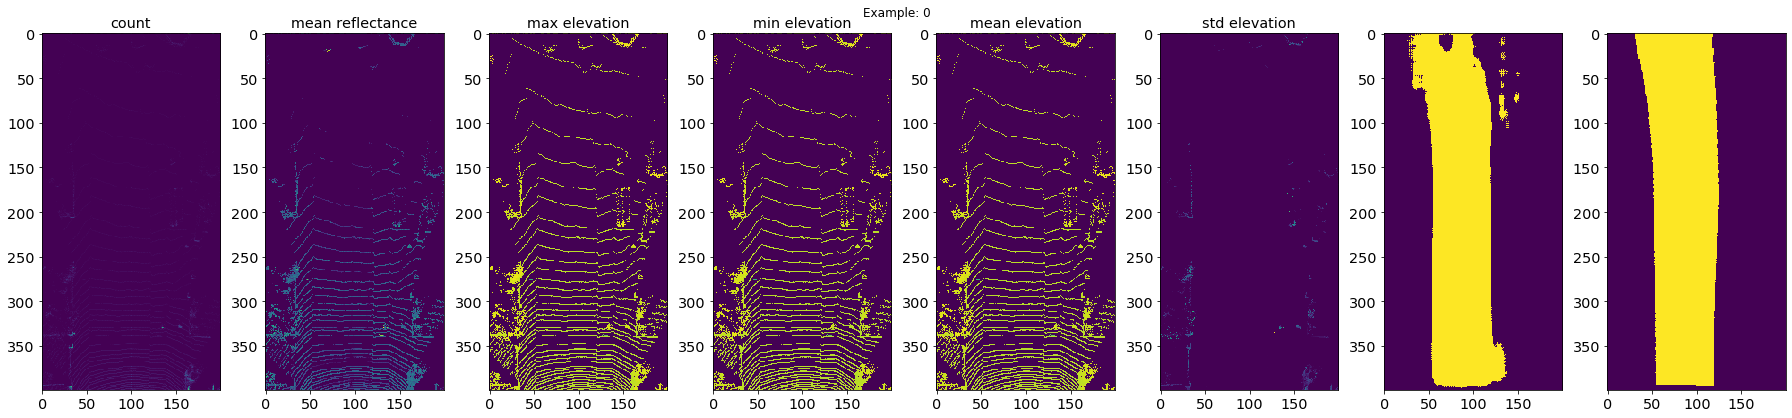

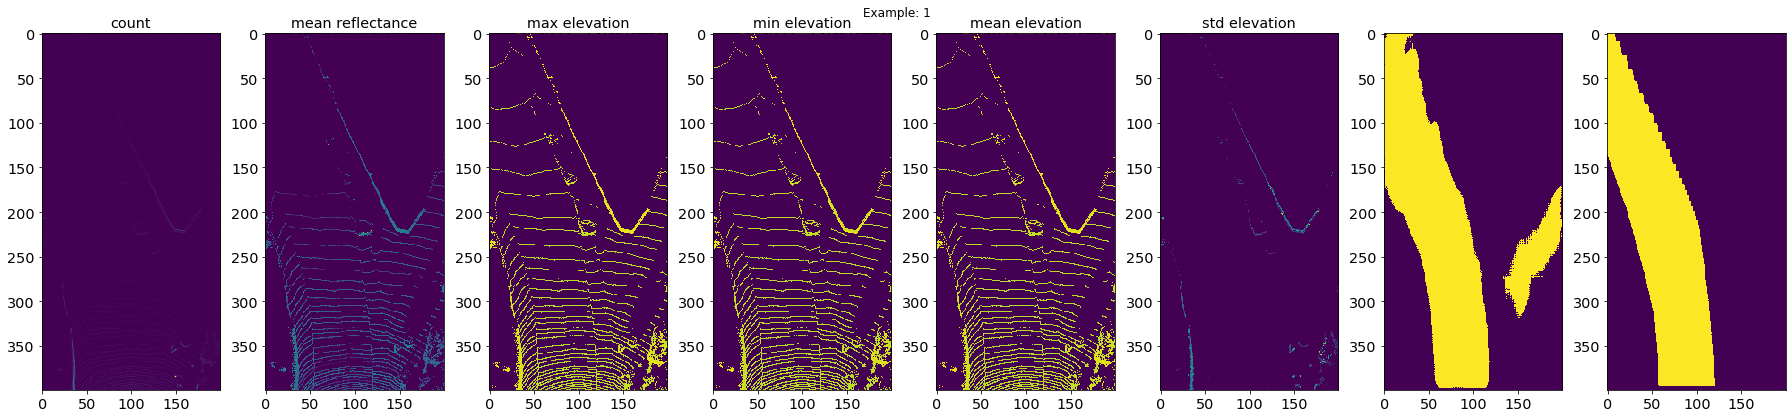

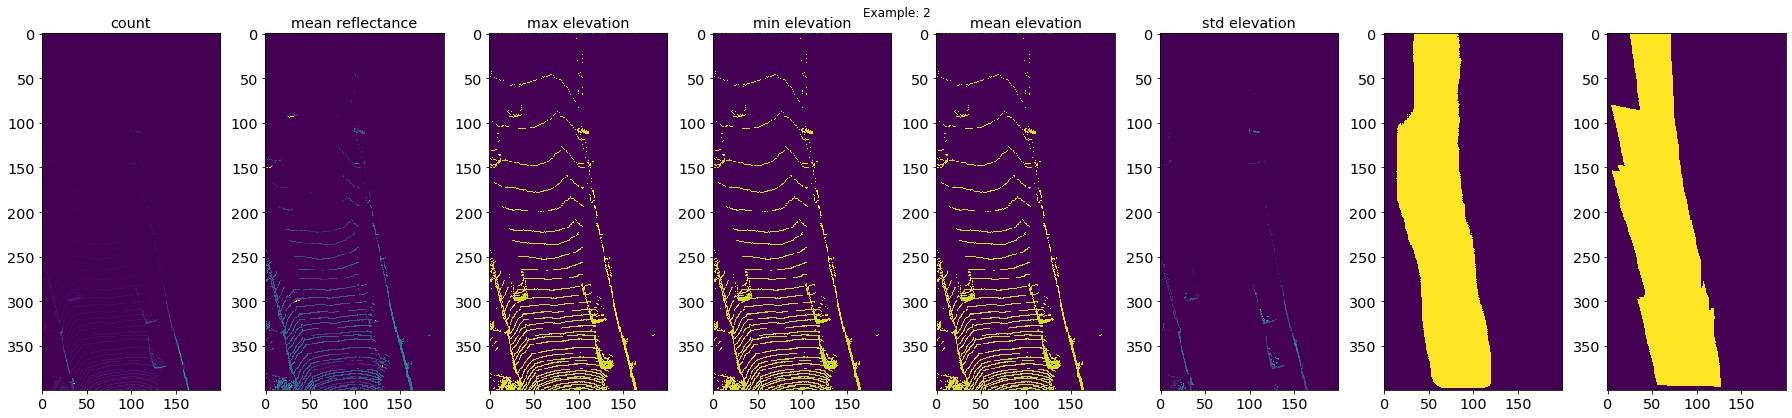

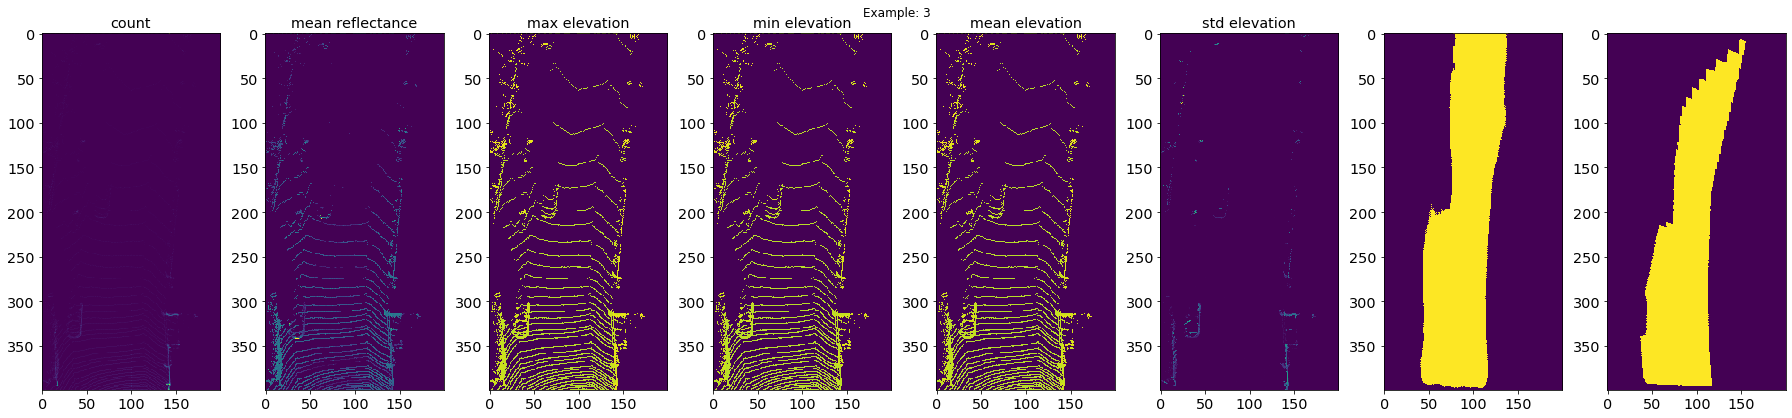

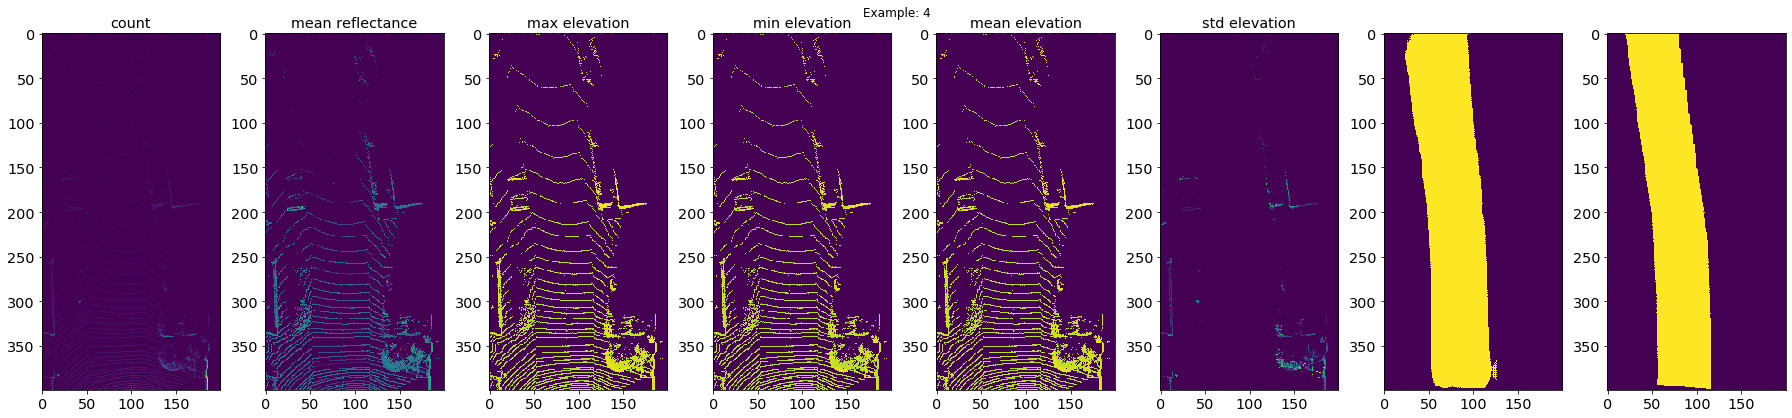

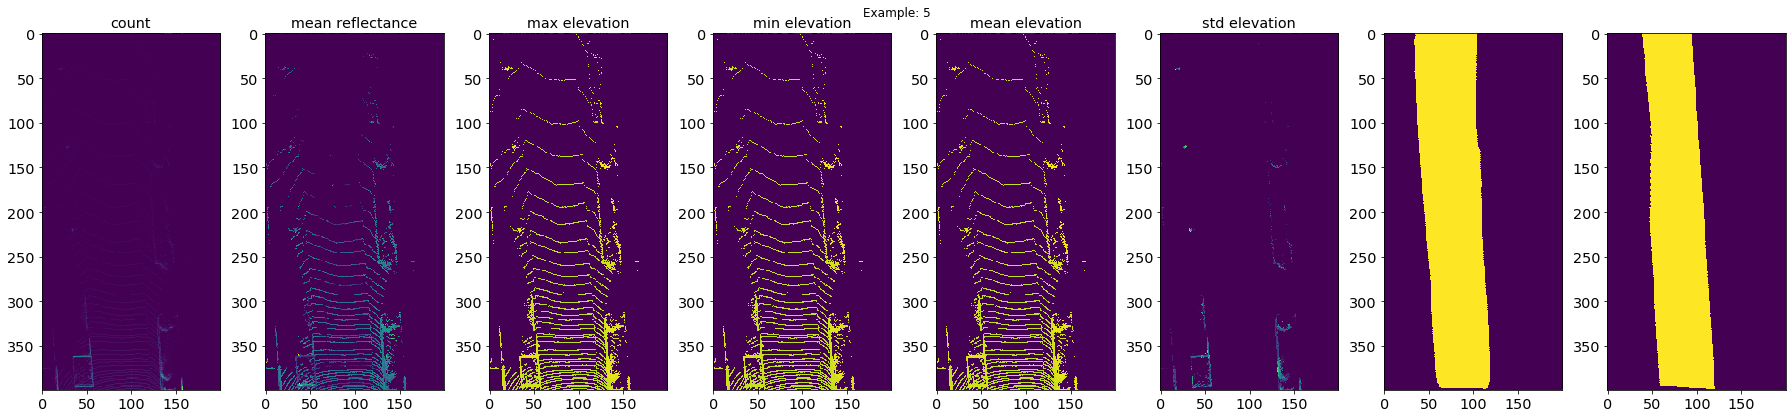

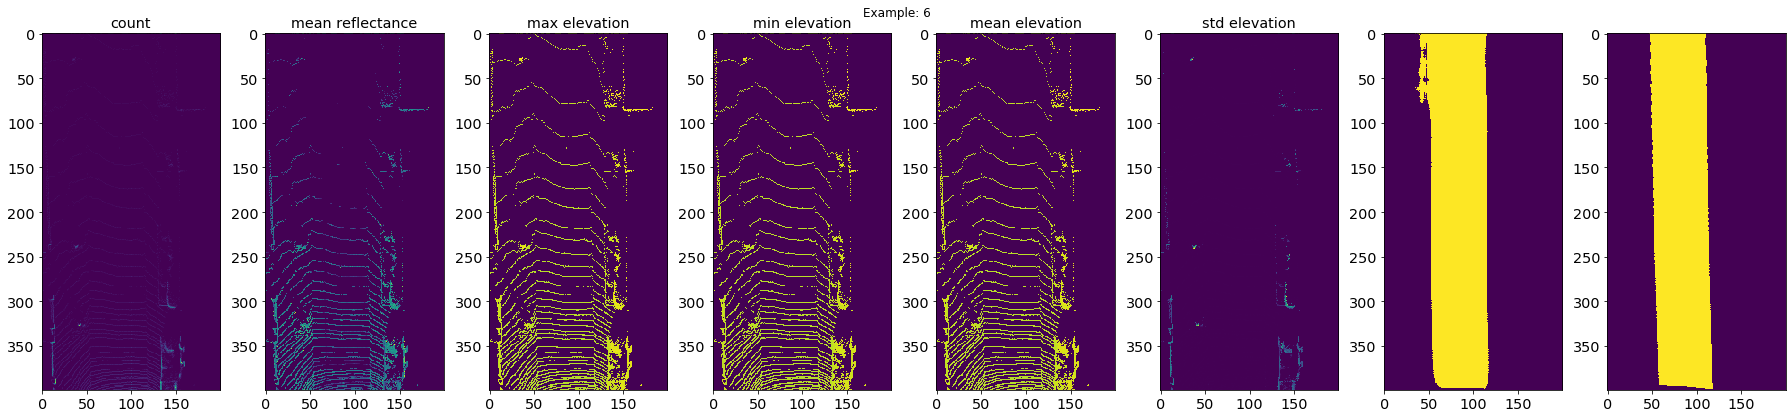

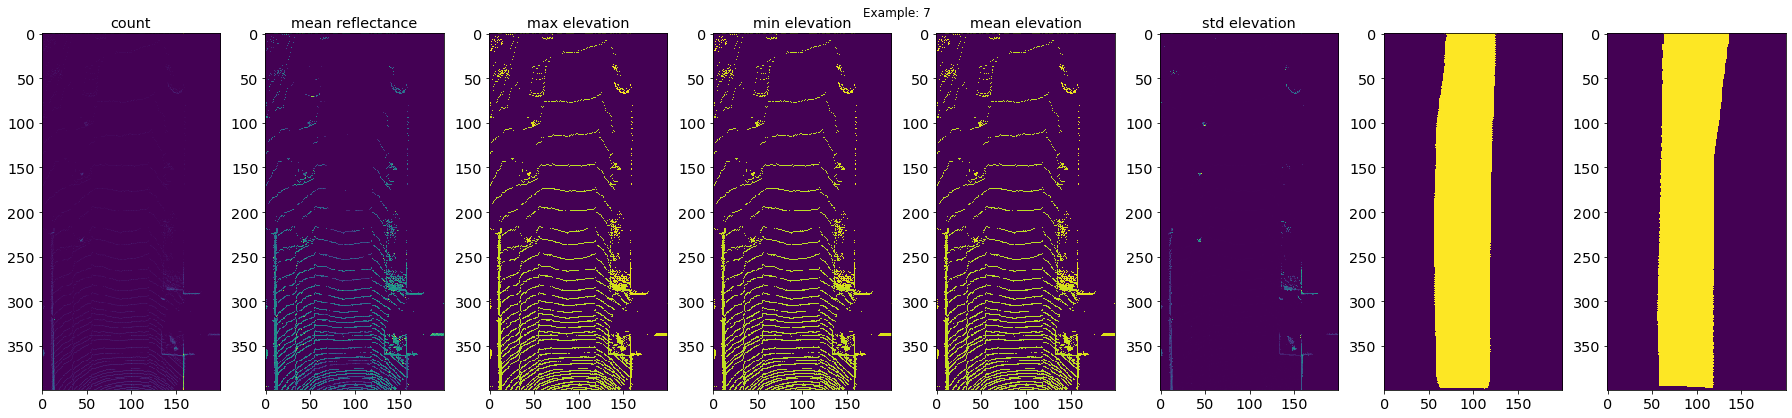

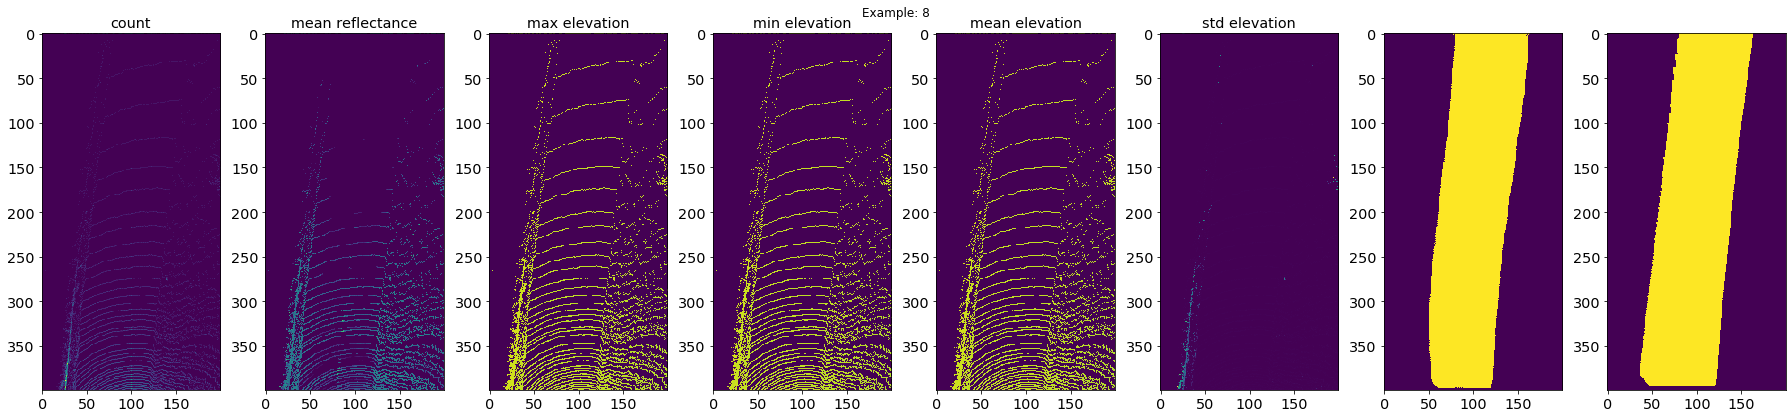

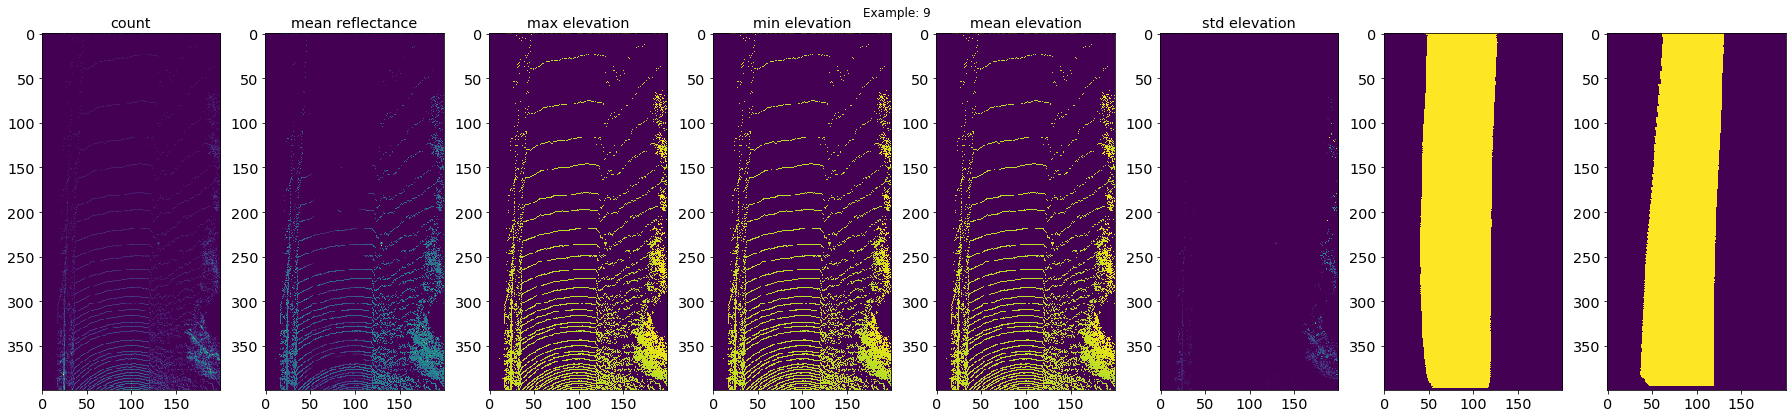

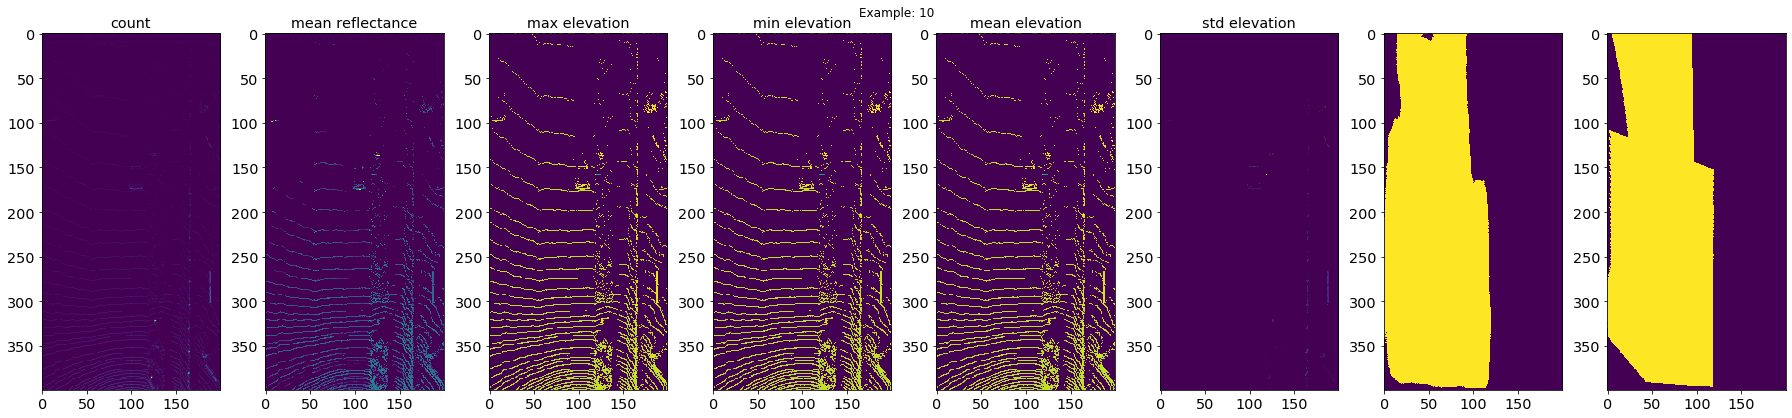

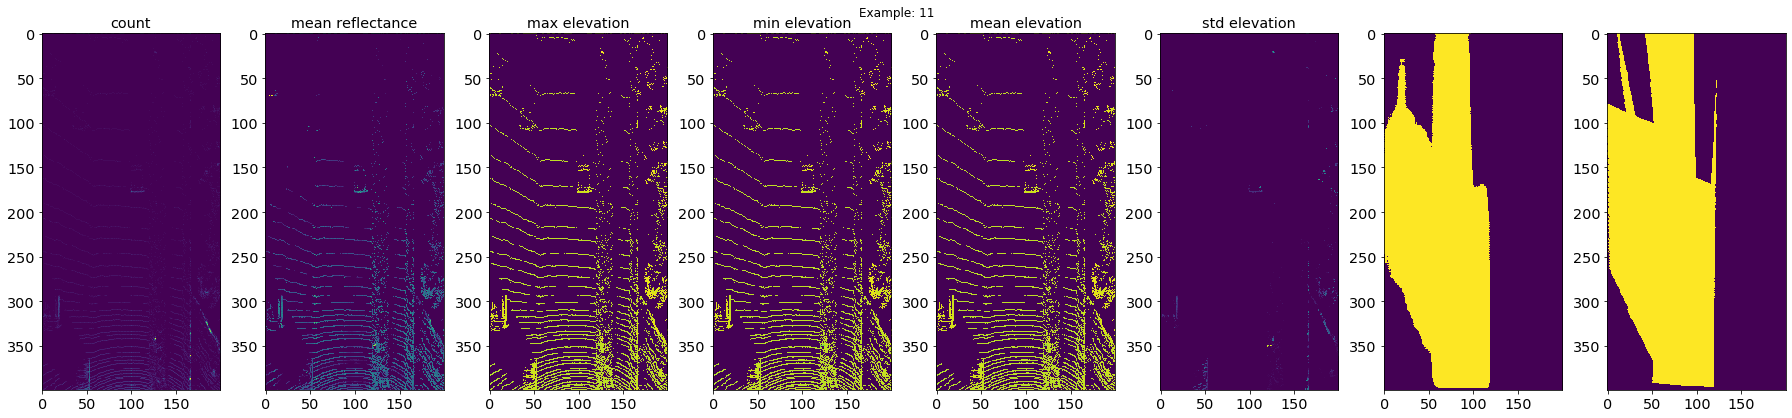

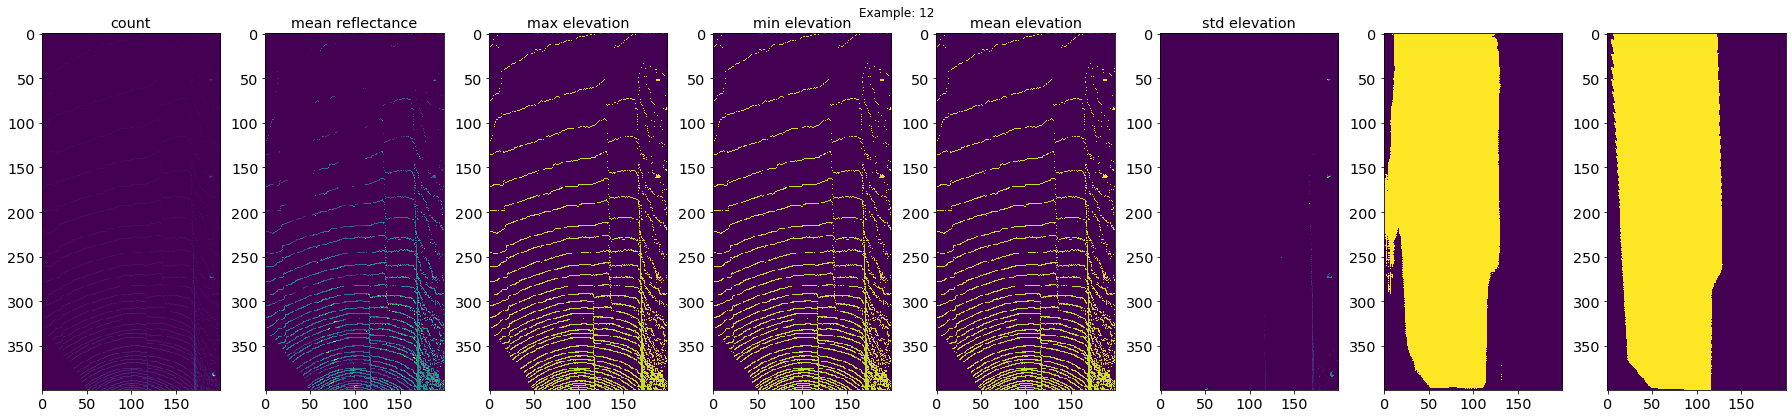

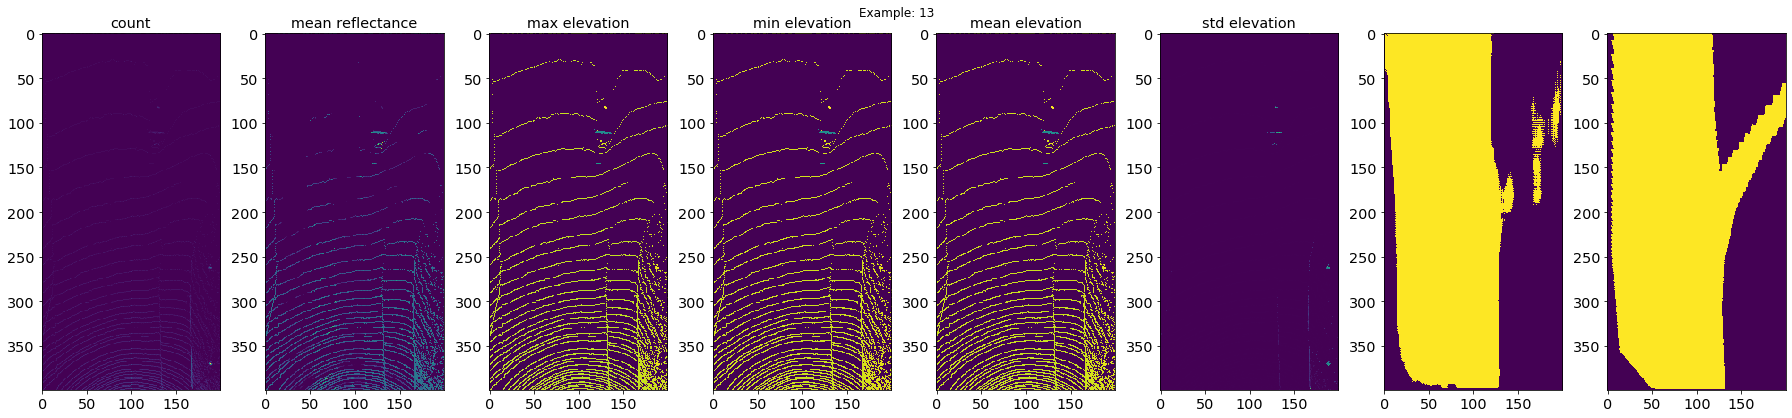

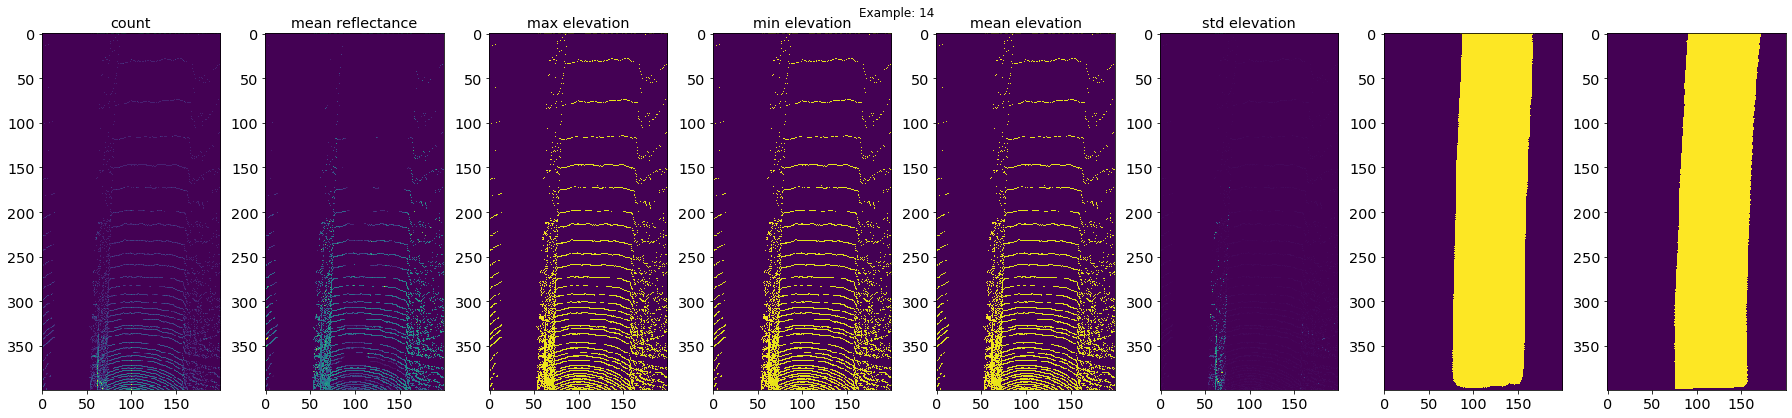

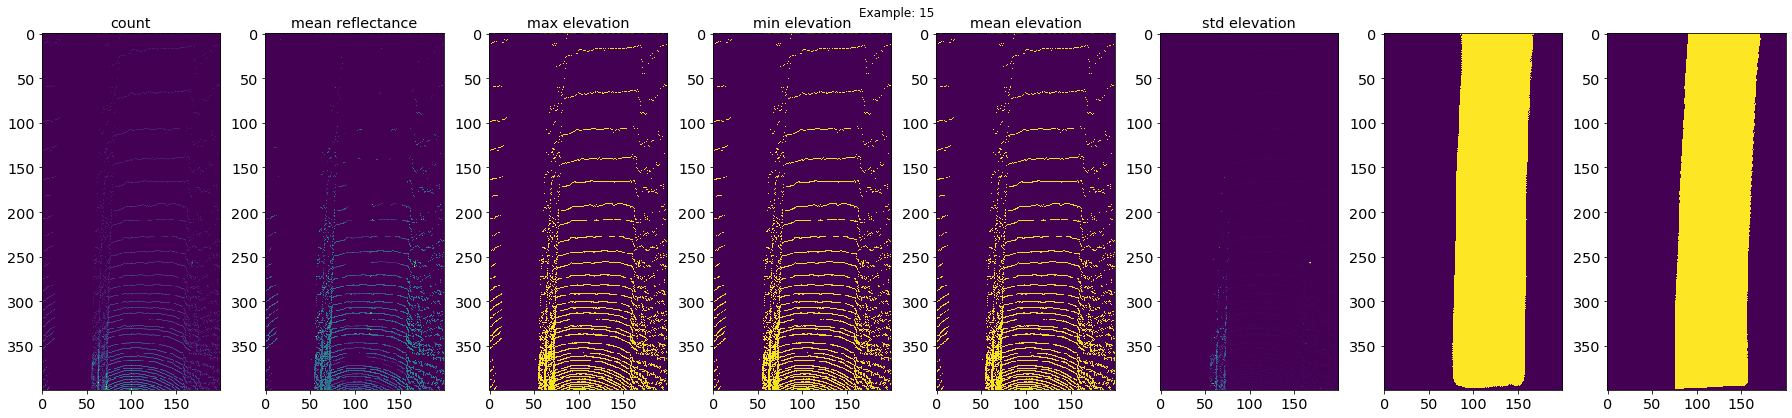

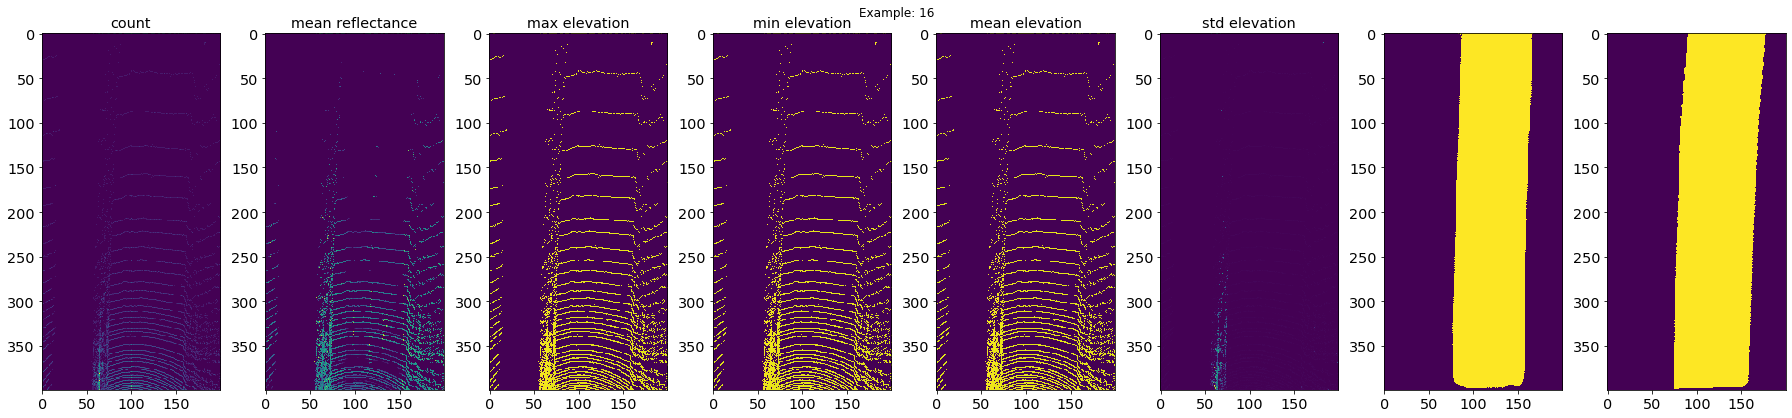

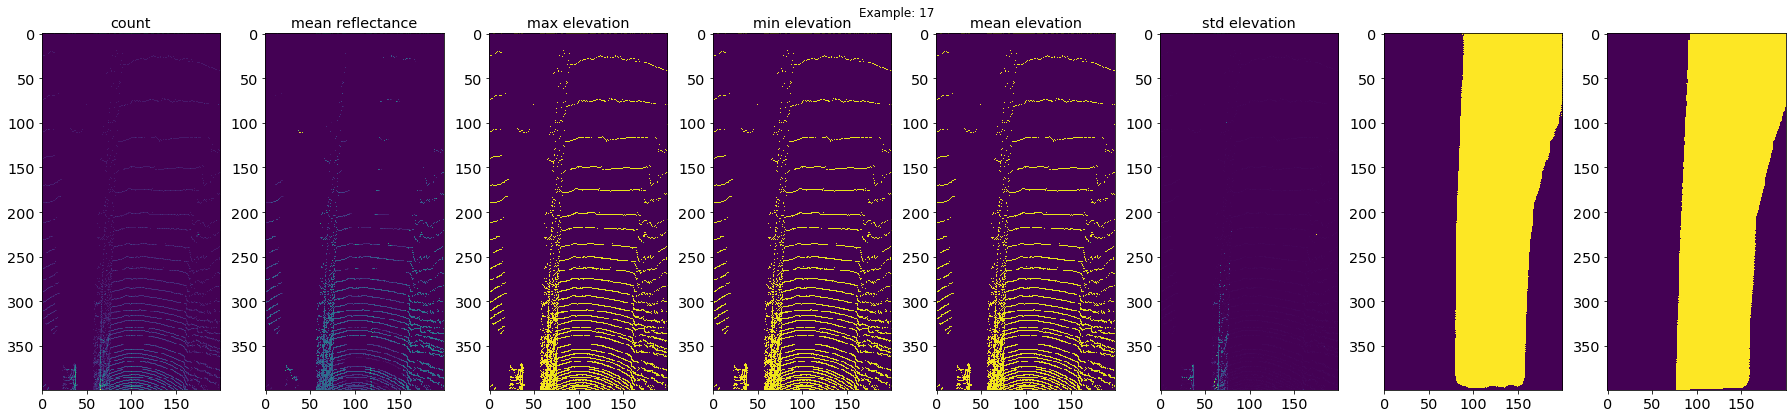

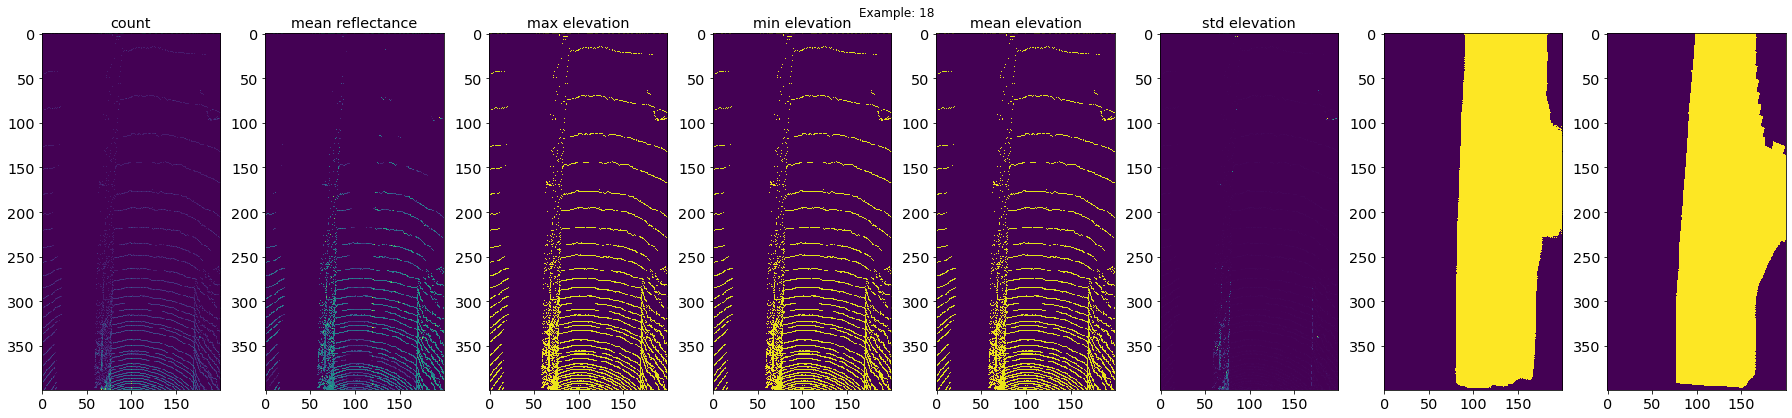

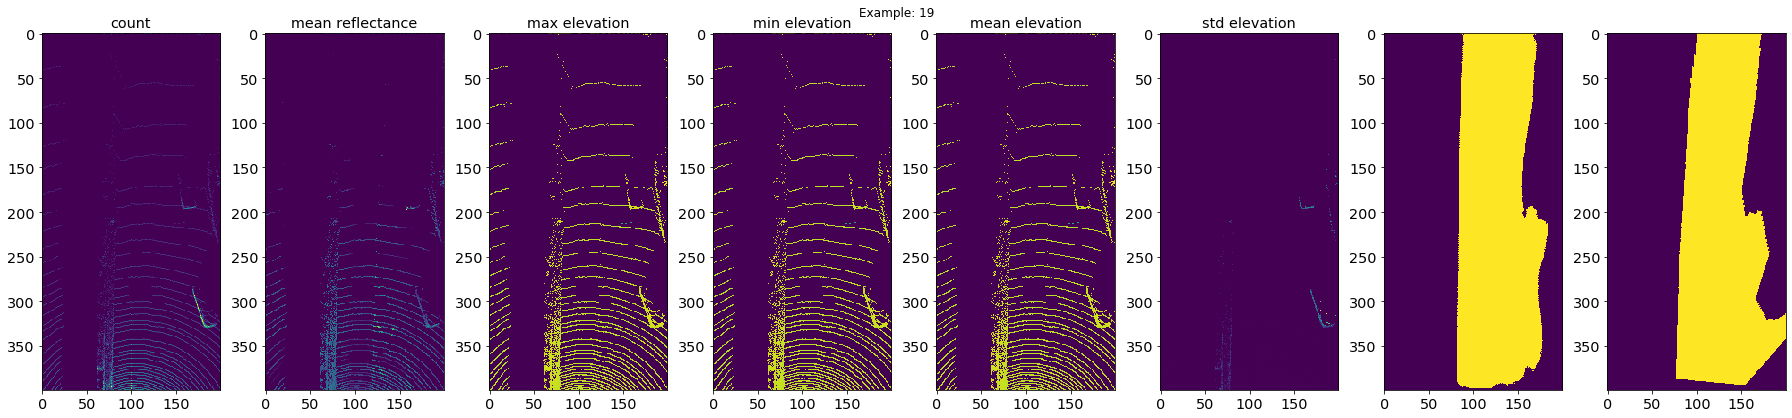

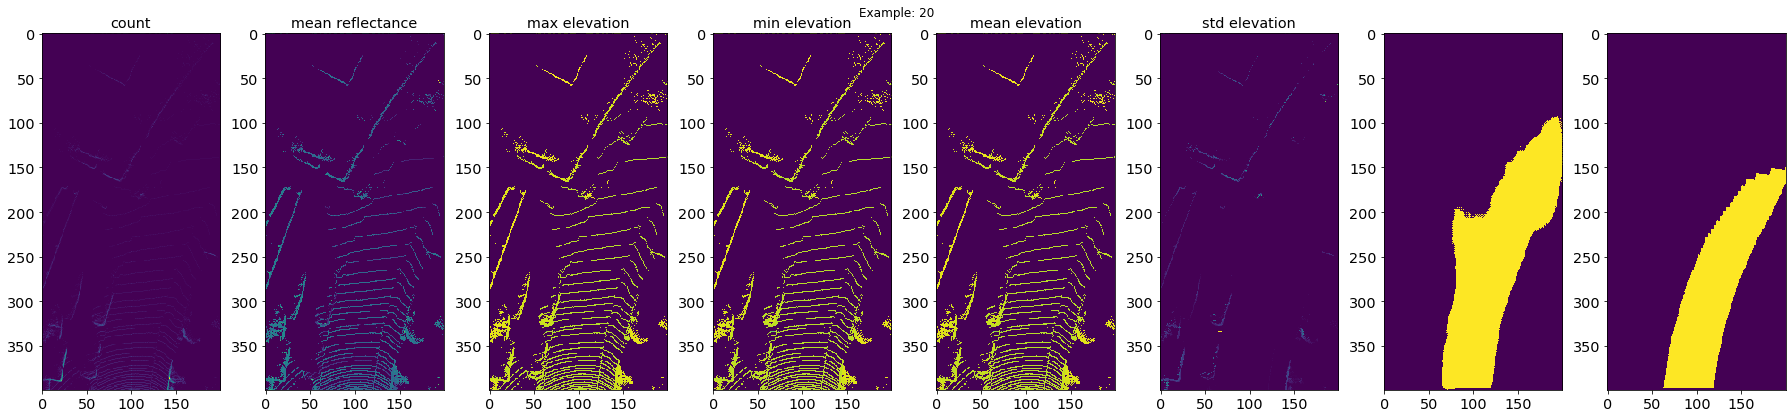

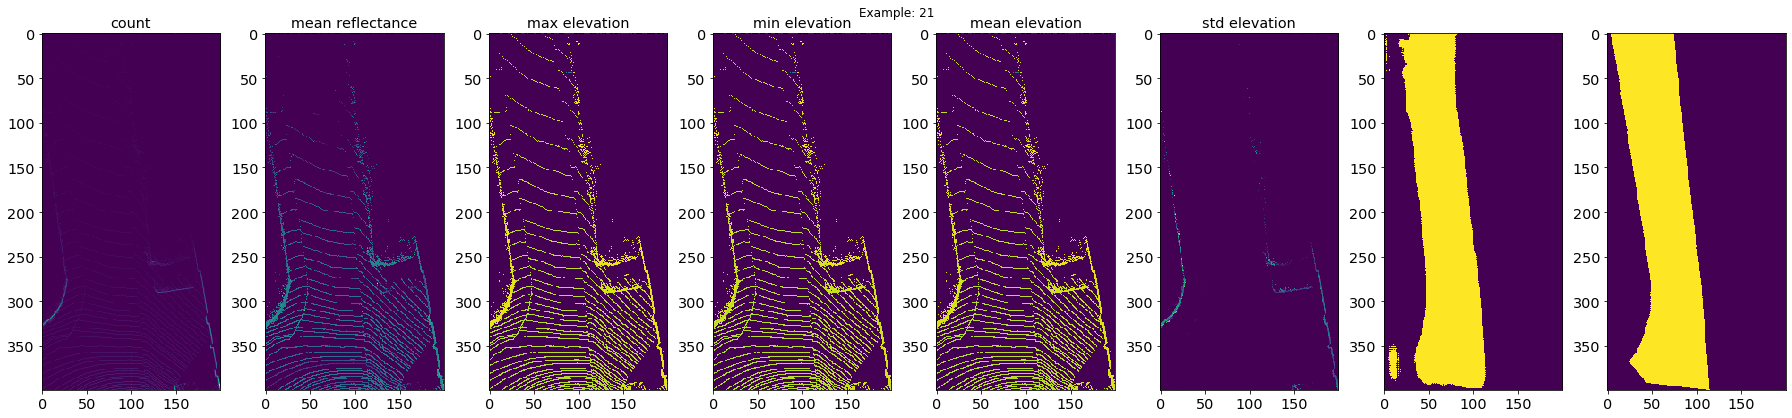

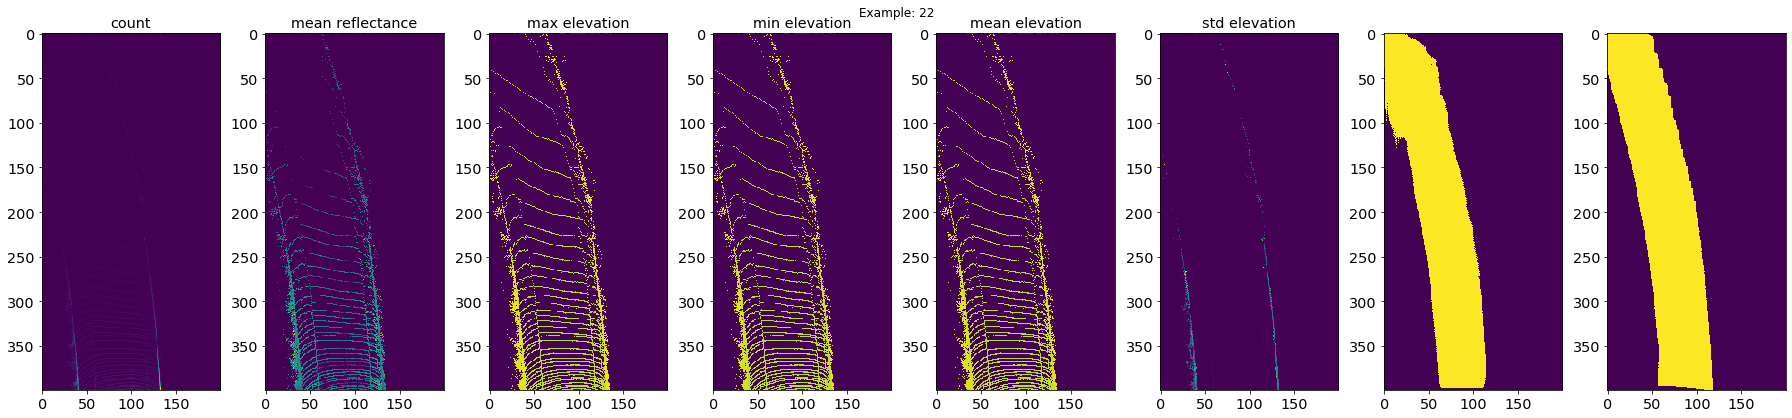

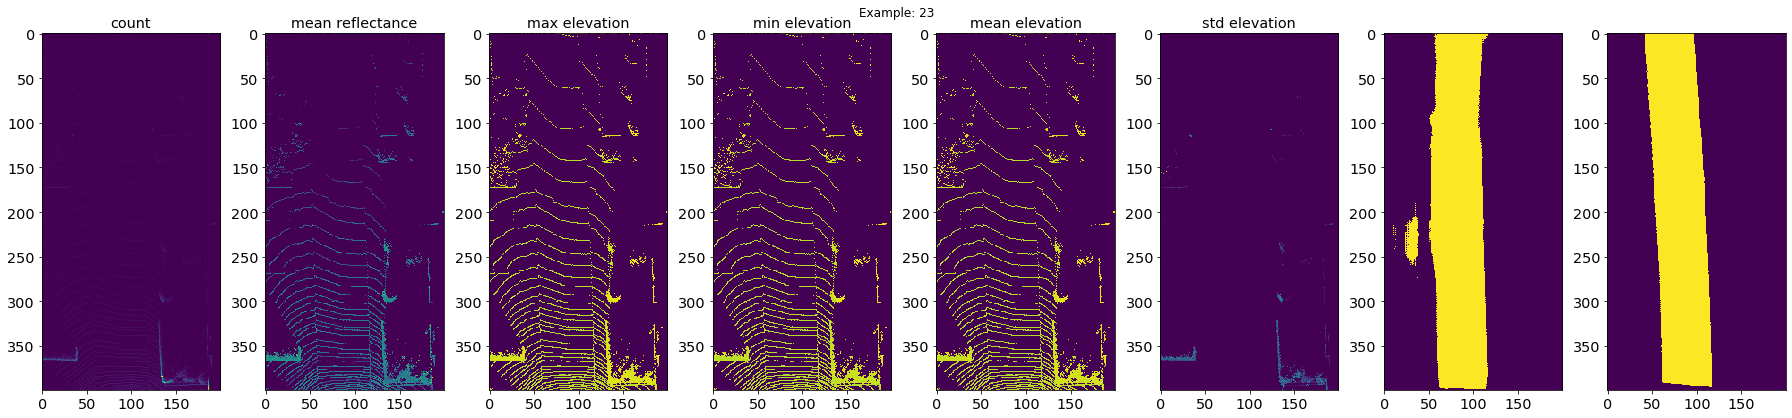

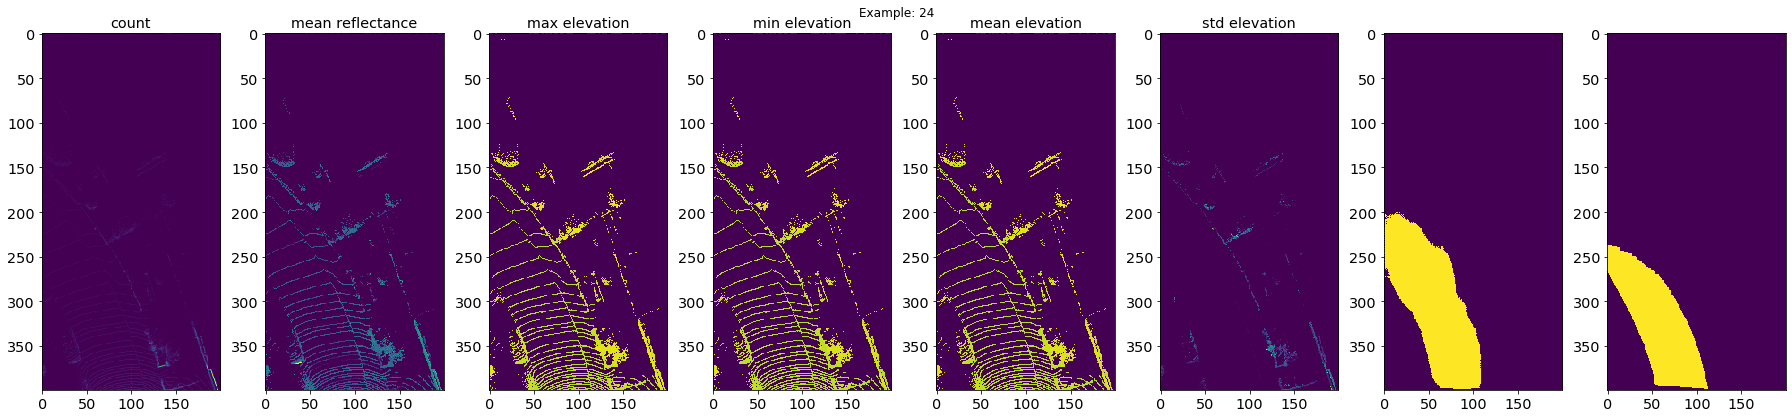

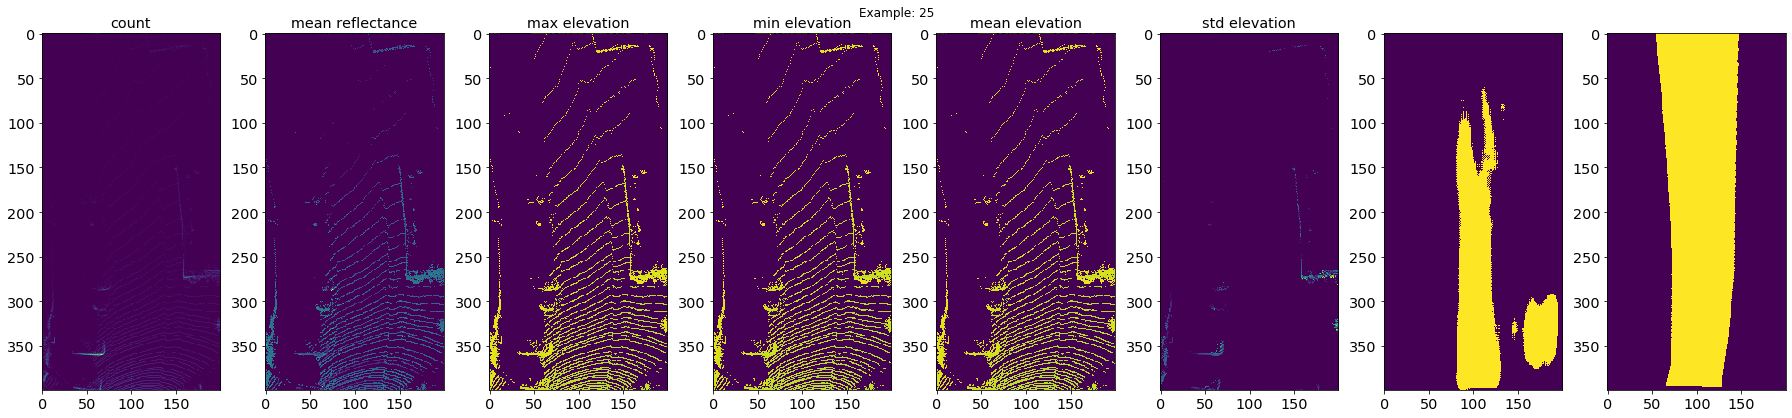

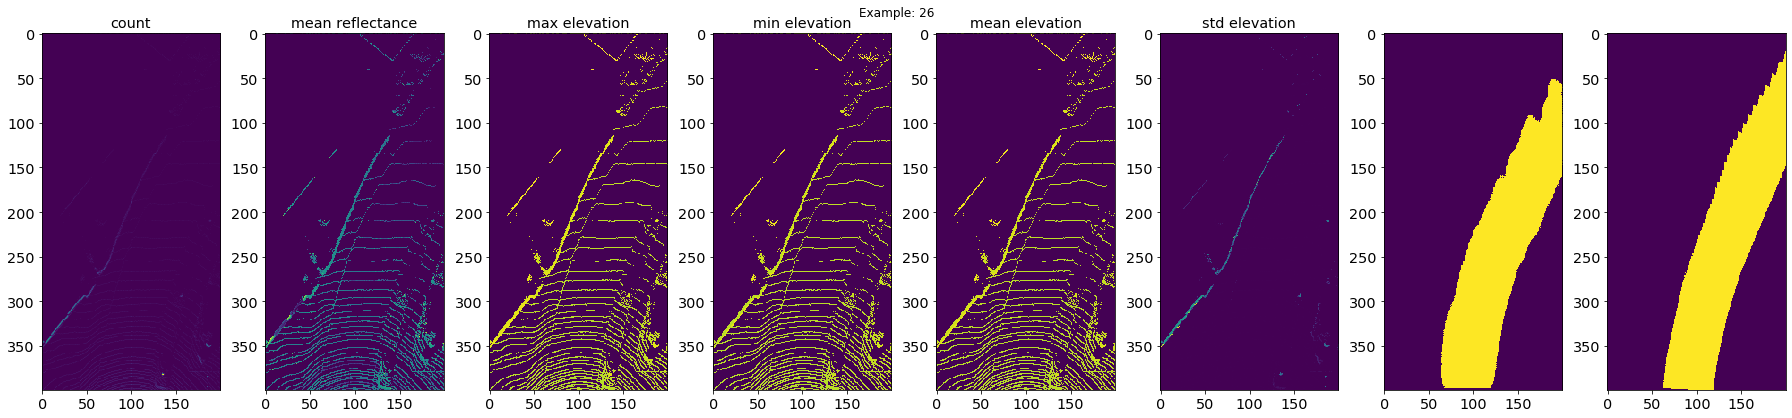

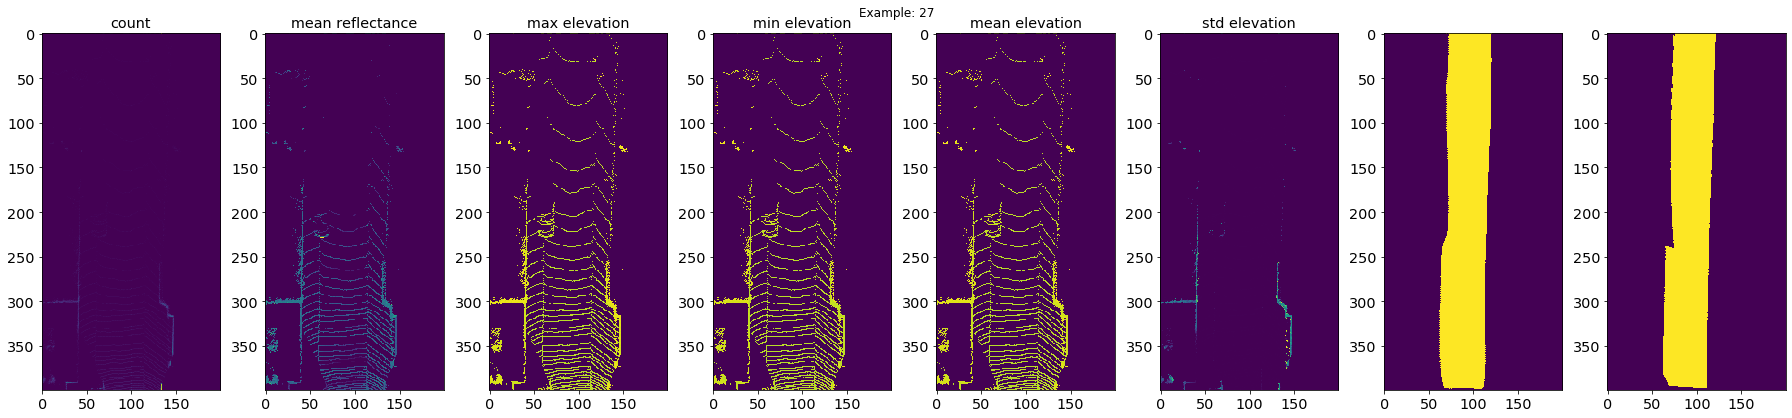

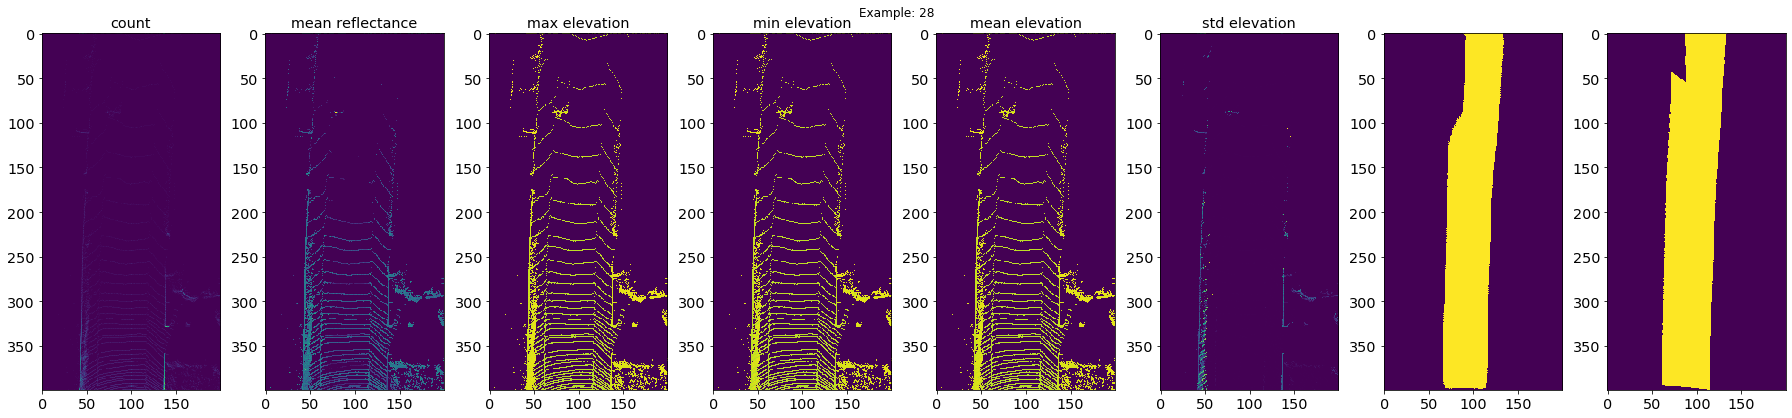

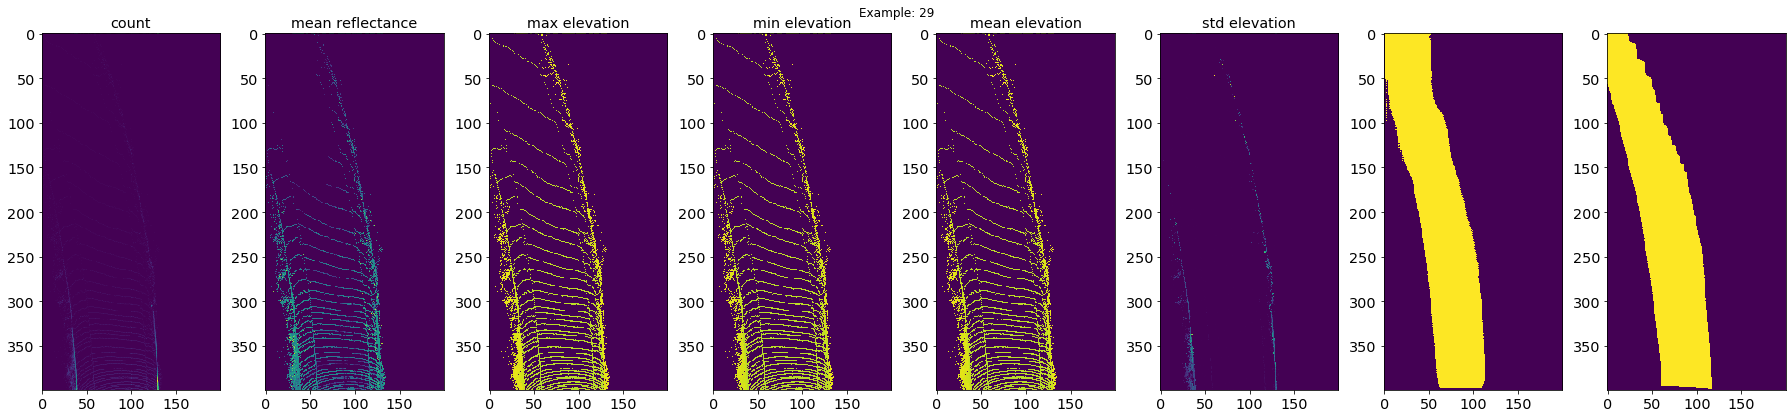

In [6]:
# n = np.random.randint(30)

titles = ['count', 'mean reflectance', 'max elevation', 'min elevation', 'mean elevation', 'std elevation']
k = 'classical_geometric'
exp = Experiment(path,weights=lodnn_weights_dict[k], model_name='lodnn', view='bev', dataset='kitti')
f_test, gt_test = exp.KPC.load_dataset(set_type='test')
pred, times = exp.run_pred(f_test)
for n in range(30):
    fig, ax = plt.subplots(1, 8, figsize=(25, 6))
    fig.suptitle("Example: {}".format(n))
    for i in range(6):
        ax[i].imshow(f_test[n, :, :, i])
        ax[i].set_title(titles[i])
    ax[-2].imshow(pred[n, :, :, 0]>0.5)
    ax[-1].imshow(gt_test[n, :, :, 0])
    plt.tight_layout()

29


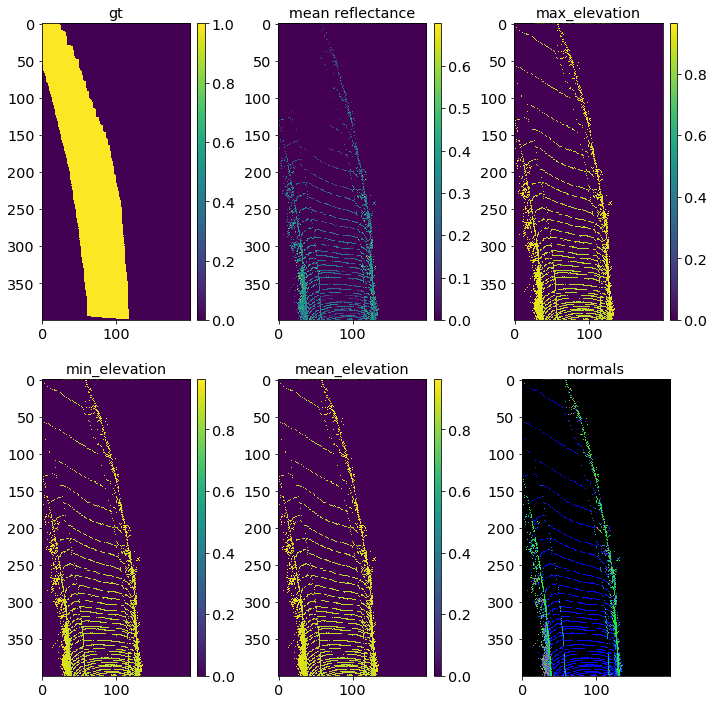

In [22]:
titles = ['gt', 'mean reflectance', 'max_elevation', 'min_elevation', 'mean_elevation', 'normals']
fig, axs = plt.subplots(2, 3, figsize=(12, 12))
idx = np.random.randint(len(f_test))
print(idx)
for n, ax in enumerate(axs.ravel()):
    if n == 0:
        im = ax.imshow(gt_test[idx, :, :, 0])
        divider = make_axes_locatable(ax)
        cax = divider.append_axes("right", size="5%", pad=0.10)
        fig.colorbar(im, cax=cax)
    elif n < 5:
        im = ax.imshow(f_test[idx, :, :, n])
        divider = make_axes_locatable(ax)
        cax = divider.append_axes("right", size="5%", pad=0.10)
        fig.colorbar(im, cax=cax)
    else:
        ax.imshow(np.abs(f_test[idx, :, :, 6:9]))
    ax.set_title(titles[n])

In [8]:
compute_scores(pred[:,:,:,0], gt_test, threshold=0.5)

Scores: F1 -> 0.9297129979484391, Recall -> 0.9264020399408532, Precision -> 0.9330477075513824, Accuracy -> 0.9512933333333333, Jaccard -> 0.8686576555319603
------------------------------------------------


{'f1': 0.9297129979484391,
 'recall': 0.9264020399408532,
 'precision': 0.9330477075513824,
 'acc': 0.9512933333333333,
 'jaccard': 0.8686576555319603}

In [9]:
exp.average_precision_score(gt_test, pred)

0.9834075022380437

In [9]:
prec, recall = exp.precision_recall_curve(gt_test, pred)

Scores test: Best F1: 0.8532409817031669, Rec: 0.8937910258898978, Prec: 0.8162106502556201, threshold: 0.3993803560733795


In [6]:
avg_prec

{'classical_subsampled_32': 0.9808079701984335,
 'classical': 0.9770006233668962,
 'classical_eigen': 0.9843844559208588,
 'classical_geometric_eigen': 0.984156029147354,
 'classical_geometric': 0.9834075006840203,
 'classical_geometric_subsampled_32': 0.9816435549114985,
 'classical_eigen_subsampled_32': 0.9815065655849253,
 'classical_geometric_eigen_subsampled_32': 0.983874603218077}

classical_subsampled_32
classical
classical_eigen
classical_geometric_eigen
classical_geometric
classical_geometric_subsampled_32
classical_eigen_subsampled_32
classical_geometric_eigen_subsampled_32


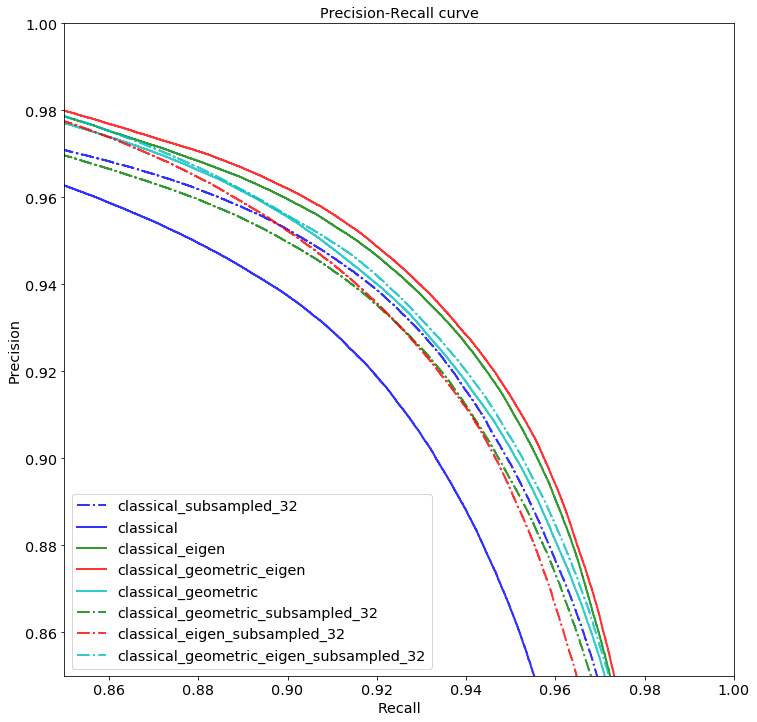

In [8]:
# In matplotlib < 1.5, plt.fill_between does not have a 'step' argument
plt.figure(figsize=(12,12))
legend_list = []
color_list = ['b', 'g', 'r', 'c']
n_16 = 0
n_32 = 0
n_64 = 0
for k in prec_scores:
    print(k)
    if '16' in k:
        legend_list.append(k)
        plt.step(prec_scores[k], recall_scores[k], linewidth=2, linestyle='--', color=color_list[n_16], alpha=0.8, where='post')
        n_16 += 1
        
    if '32' in k:
        legend_list.append(k)
        plt.step(prec_scores[k], recall_scores[k], linewidth=2, linestyle='-.', color=color_list[n_32], alpha=0.8, where='post')
        n_32 += 1
    
    if '16' not in k and '32' not in k:
        legend_list.append(k)
        plt.step(prec_scores[k], recall_scores[k], linewidth=2, linestyle='-', color=color_list[n_64], alpha=0.8, where='post')
        n_64 += 1
#       plt.step(prec_scores[k], recall_scores[k], linewidth=2, color='xkcd:purple', alpha=0.8, where='post')
# plt.step(rec_c_g, prec_c_g, linewidth=2, color='xkcd:green', alpha=0.8, where='post')

# plt.step(rec_c_s_32, prec_c_s_32, linewidth=2, color='xkcd:blue', alpha=0.8, where='post')
# plt.step(rec_c_g_s_32, prec_c_g_s_32, linewidth=2, color='xkcd:brown', alpha=0.8, where='post')

# plt.step(rec_c_s_16, prec_c_s_16, linewidth=2, color='xkcd:red', alpha=0.8, where='post')
# plt.step(rec_c_g_s_16, prec_c_g_s_16, linewidth=2, color='xkcd:teal', alpha=0.8, where='post')
# plt.step(rec_c_g_s, prec_c_g_s, linewidth=2, color='xkcd:orange', alpha=0.8, where='post')
# plt.step(rec_c_g_s_h, prec_c_g_s_h, linewidth=2, color='xkcd:goldenrod', alpha=0.8, where='post')


plt.xlabel('Recall')
plt.ylabel('Precision')
plt.ylim([0.85, 1.0])
plt.xlim([0.85, 1.0])
plt.title('Precision-Recall curve')
plt.legend(legend_list, loc=3)
# plt.legend(['Classic',
#             'Classic + Geometrical',
#             'Classic + Subsampling 32',
#             'Classic + Geometrical + Subsampling 32',
#             'Classic + Subsampling 16',
#             'Classic + Geometrical + Subsampling 16'], loc=3)

In [12]:
avg_prec

{'classical': 0.9485695908572019,
 'classical_geometric': 0.2571309800960235,
 'classical_eigen': 0.286493358193474,
 'classical_geometric_eigen': 0.2993733116834207,
 'classical_subsampled_32': 0.9053743463059519,
 'classical_geometric_subsampled_32': 0.25922007851859946,
 'classical_eigen_subsampled_32': 0.34618790863931254,
 'classical_geometric_eigen_subsampled_32': 0.2762724562823233}

### Evaluating results Unet on Kitti

In [13]:
models_basedir = '../output/experiment0/'
models_list = sorted(os.listdir(models_basedir))
unet_weights_dict = {}
for m in models_list:
    if 'unet' in m and 'semantic' not in m:
        with open(os.path.join(models_basedir, m, 'details.json'), 'r') as f:
            details = json.load(f)
        testname = details['test_name'].lower()
        unet_weights_dict[testname] = os.path.join(models_basedir, m, 'model/best_model.h5')

In [14]:
unet_weights_dict

{'classical_subsample_16': '../output/experiment0/unet_2019_11_08_18_31/model/best_model.h5',
 'classical_geometric_subsample_16': '../output/experiment0/unet_2019_11_08_18_35/model/best_model.h5',
 'classical_eigen_subsample_16': '../output/experiment0/unet_2019_11_08_18_38/model/best_model.h5',
 'classical_geometric_eigen_subsample_16': '../output/experiment0/unet_2019_11_08_18_41/model/best_model.h5',
 'classical_subsampled_32': '../output/experiment0/unet_2019_11_08_18_46/model/best_model.h5',
 'classical_geometric_subsampled_32': '../output/experiment0/unet_2019_11_08_18_49/model/best_model.h5',
 'classical_eigen_subsampled_32': '../output/experiment0/unet_2019_11_08_18_53/model/best_model.h5',
 'classical_geometric_eigen_subsampled_32': '../output/experiment0/unet_2019_11_08_18_57/model/best_model.h5',
 'classical_': '../output/experiment0/unet_2019_11_08_19_01/model/best_model.h5',
 'classical_geometric_': '../output/experiment0/unet_2019_11_08_19_06/model/best_model.h5',
 'clas

In [15]:
front_prec_scores = {}
front_recall_scores = {}
front_avg_prec = {}
for k in unet_weights_dict:
    print(k)
    exp = Experiment(path,weights=unet_weights_dict[k], model_name='unet', view='front', dataset='kitti')
    f_test, gt_test = exp.KPC.load_dataset()
    pred, times = exp.run_pred(f_test)
    front_avg_prec[k] = exp.average_precision_score(gt_test, pred)
    prec, recall = exp.precision_recall_curve(gt_test, pred)
    front_prec_scores[k] = prec
    front_recall_scores[k] = recall

classical_subsample_16
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            (None, None, None, 3 0                                            
__________________________________________________________________________________________________
conv2d_145 (Conv2D)             (None, None, None, 8 224         input_1[0][0]                    
__________________________________________________________________________________________________
batch_normalization_1 (BatchNor (None, None, None, 8 32          conv2d_145[0][0]                 
__________________________________________________________________________________________________
spatial_dropout2d_85 (SpatialDr (None, None, None, 8 0           batch_normalization_1[0][0]      
______________________________________________________________________________________

100%|██████████| 30/30 [00:00<00:00, 3058.63it/s]

Loading dataset
nCPUs = 8


nCPUs = 8
nCPUs = 8
nCPUs = 8
Elapsed time to exectute predict_sample: 0.9166665077209473
Elapsed time to exectute predict_sample: 0.0424501895904541
Elapsed time to exectute predict_sample: 0.04618954658508301
Elapsed time to exectute predict_sample: 0.051787614822387695
Elapsed time to exectute predict_sample: 0.050240516662597656
Elapsed time to exectute predict_sample: 0.052800893783569336
Elapsed time to exectute predict_sample: 0.05339241027832031
Elapsed time to exectute predict_sample: 0.051087141036987305
Elapsed time to exectute predict_sample: 0.052094221115112305
Elapsed time to exectute predict_sample: 0.05653023719787598
Elapsed time to exectute predict_sample: 0.05155181884765625
Elapsed time to exectute predict_sample: 0.05178022384643555
Elapsed time to exectute predict_sample: 0.050415754318237305
Elapsed time to exectute predict_sample: 0.05107545852661133
Elapsed time to exectute predict_sample: 0.050848960876464844
Elapsed time to exectute predict_sample: 0.0501639

100%|██████████| 30/30 [00:00<00:00, 3132.18it/s]

Loading dataset
nCPUs = 8


nCPUs = 8
nCPUs = 8
nCPUs = 8
Elapsed time to exectute predict_sample: 0.9634590148925781
Elapsed time to exectute predict_sample: 0.04333782196044922
Elapsed time to exectute predict_sample: 0.04695630073547363
Elapsed time to exectute predict_sample: 0.06098222732543945
Elapsed time to exectute predict_sample: 0.06702160835266113
Elapsed time to exectute predict_sample: 0.05970311164855957
Elapsed time to exectute predict_sample: 0.05824017524719238
Elapsed time to exectute predict_sample: 0.0594477653503418
Elapsed time to exectute predict_sample: 0.05134439468383789
Elapsed time to exectute predict_sample: 0.05060863494873047
Elapsed time to exectute predict_sample: 0.05312299728393555
Elapsed time to exectute predict_sample: 0.05220174789428711
Elapsed time to exectute predict_sample: 0.05246162414550781
Elapsed time to exectute predict_sample: 0.05057573318481445
Elapsed time to exectute predict_sample: 0.05030417442321777
Elapsed time to exectute predict_sample: 0.04915690422058

100%|██████████| 30/30 [00:00<00:00, 1905.03it/s]

Loading dataset
nCPUs = 8


nCPUs = 8
nCPUs = 8
nCPUs = 8
Elapsed time to exectute predict_sample: 1.1863512992858887
Elapsed time to exectute predict_sample: 0.04944944381713867
Elapsed time to exectute predict_sample: 0.05673360824584961
Elapsed time to exectute predict_sample: 0.05189228057861328
Elapsed time to exectute predict_sample: 0.047418832778930664
Elapsed time to exectute predict_sample: 0.05073142051696777
Elapsed time to exectute predict_sample: 0.057654619216918945
Elapsed time to exectute predict_sample: 0.05663180351257324
Elapsed time to exectute predict_sample: 0.07053732872009277
Elapsed time to exectute predict_sample: 0.08264327049255371
Elapsed time to exectute predict_sample: 0.07198953628540039
Elapsed time to exectute predict_sample: 0.06612181663513184
Elapsed time to exectute predict_sample: 0.06191730499267578
Elapsed time to exectute predict_sample: 0.055344343185424805
Elapsed time to exectute predict_sample: 0.054443359375
Elapsed time to exectute predict_sample: 0.055591583251953

100%|██████████| 30/30 [00:00<00:00, 1957.45it/s]

Loading dataset
nCPUs = 8


nCPUs = 8
nCPUs = 8
nCPUs = 8
Elapsed time to exectute predict_sample: 1.1742584705352783
Elapsed time to exectute predict_sample: 0.04954934120178223
Elapsed time to exectute predict_sample: 0.05334019660949707
Elapsed time to exectute predict_sample: 0.05207252502441406
Elapsed time to exectute predict_sample: 0.05113935470581055
Elapsed time to exectute predict_sample: 0.05079793930053711
Elapsed time to exectute predict_sample: 0.04600930213928223
Elapsed time to exectute predict_sample: 0.04935479164123535
Elapsed time to exectute predict_sample: 0.04658246040344238
Elapsed time to exectute predict_sample: 0.04935503005981445
Elapsed time to exectute predict_sample: 0.054113149642944336
Elapsed time to exectute predict_sample: 0.061197757720947266
Elapsed time to exectute predict_sample: 0.06283354759216309
Elapsed time to exectute predict_sample: 0.05850028991699219
Elapsed time to exectute predict_sample: 0.05507326126098633
Elapsed time to exectute predict_sample: 0.05028414726

100%|██████████| 30/30 [00:00<00:00, 2129.02it/s]

Loading dataset
nCPUs = 8


nCPUs = 8
nCPUs = 8
nCPUs = 8
Elapsed time to exectute predict_sample: 1.199192762374878
Elapsed time to exectute predict_sample: 0.0714714527130127
Elapsed time to exectute predict_sample: 0.06817364692687988
Elapsed time to exectute predict_sample: 0.07158756256103516
Elapsed time to exectute predict_sample: 0.0699310302734375
Elapsed time to exectute predict_sample: 0.06653118133544922
Elapsed time to exectute predict_sample: 0.06857538223266602
Elapsed time to exectute predict_sample: 0.07458305358886719
Elapsed time to exectute predict_sample: 0.07429242134094238
Elapsed time to exectute predict_sample: 0.0698692798614502
Elapsed time to exectute predict_sample: 0.07186102867126465
Elapsed time to exectute predict_sample: 0.07744908332824707
Elapsed time to exectute predict_sample: 0.07550477981567383
Elapsed time to exectute predict_sample: 0.07296347618103027
Elapsed time to exectute predict_sample: 0.07757019996643066
Elapsed time to exectute predict_sample: 0.07744145393371582

100%|██████████| 30/30 [00:00<00:00, 1861.24it/s]

Loading dataset
nCPUs = 8


nCPUs = 8
nCPUs = 8
nCPUs = 8
Elapsed time to exectute predict_sample: 1.147155523300171
Elapsed time to exectute predict_sample: 0.06077289581298828
Elapsed time to exectute predict_sample: 0.06040000915527344
Elapsed time to exectute predict_sample: 0.059815168380737305
Elapsed time to exectute predict_sample: 0.06044125556945801
Elapsed time to exectute predict_sample: 0.06045937538146973
Elapsed time to exectute predict_sample: 0.06190371513366699
Elapsed time to exectute predict_sample: 0.05990147590637207
Elapsed time to exectute predict_sample: 0.059810638427734375
Elapsed time to exectute predict_sample: 0.05908036231994629
Elapsed time to exectute predict_sample: 0.06247687339782715
Elapsed time to exectute predict_sample: 0.06026887893676758
Elapsed time to exectute predict_sample: 0.06085085868835449
Elapsed time to exectute predict_sample: 0.06152629852294922
Elapsed time to exectute predict_sample: 0.06592249870300293
Elapsed time to exectute predict_sample: 0.062875032424

100%|██████████| 30/30 [00:00<00:00, 1960.44it/s]

Loading dataset
nCPUs = 8


nCPUs = 8
nCPUs = 8
nCPUs = 8
Elapsed time to exectute predict_sample: 1.248124599456787
Elapsed time to exectute predict_sample: 0.0940554141998291
Elapsed time to exectute predict_sample: 0.09280157089233398
Elapsed time to exectute predict_sample: 0.08964800834655762
Elapsed time to exectute predict_sample: 0.12352514266967773
Elapsed time to exectute predict_sample: 0.08468508720397949
Elapsed time to exectute predict_sample: 0.08530306816101074
Elapsed time to exectute predict_sample: 0.08645272254943848
Elapsed time to exectute predict_sample: 0.10640501976013184
Elapsed time to exectute predict_sample: 0.104705810546875
Elapsed time to exectute predict_sample: 0.09439396858215332
Elapsed time to exectute predict_sample: 0.09279584884643555
Elapsed time to exectute predict_sample: 0.09179162979125977
Elapsed time to exectute predict_sample: 0.09681510925292969
Elapsed time to exectute predict_sample: 0.09948396682739258
Elapsed time to exectute predict_sample: 0.09414267539978027

100%|██████████| 30/30 [00:00<00:00, 2129.48it/s]

Loading dataset
nCPUs = 8


nCPUs = 8
nCPUs = 8
nCPUs = 8
Elapsed time to exectute predict_sample: 1.274012565612793
Elapsed time to exectute predict_sample: 0.07916951179504395
Elapsed time to exectute predict_sample: 0.07513046264648438
Elapsed time to exectute predict_sample: 0.08073043823242188
Elapsed time to exectute predict_sample: 0.0807039737701416
Elapsed time to exectute predict_sample: 0.08161783218383789
Elapsed time to exectute predict_sample: 0.08381867408752441
Elapsed time to exectute predict_sample: 0.08254623413085938
Elapsed time to exectute predict_sample: 0.08124136924743652
Elapsed time to exectute predict_sample: 0.07967543601989746
Elapsed time to exectute predict_sample: 0.08127069473266602
Elapsed time to exectute predict_sample: 0.08102226257324219
Elapsed time to exectute predict_sample: 0.08095502853393555
Elapsed time to exectute predict_sample: 0.08075928688049316
Elapsed time to exectute predict_sample: 0.08133459091186523
Elapsed time to exectute predict_sample: 0.081572532653808

100%|██████████| 30/30 [00:00<00:00, 2270.10it/s]

Loading dataset
nCPUs = 8


nCPUs = 8
nCPUs = 8
Elapsed time to exectute predict_sample: 1.3811612129211426
Elapsed time to exectute predict_sample: 0.13634943962097168
Elapsed time to exectute predict_sample: 0.14162564277648926
Elapsed time to exectute predict_sample: 0.13383245468139648
Elapsed time to exectute predict_sample: 0.1414027214050293
Elapsed time to exectute predict_sample: 0.14202141761779785
Elapsed time to exectute predict_sample: 0.13691258430480957
Elapsed time to exectute predict_sample: 0.14141154289245605
Elapsed time to exectute predict_sample: 0.26821255683898926
Elapsed time to exectute predict_sample: 0.17861437797546387
Elapsed time to exectute predict_sample: 0.16484856605529785
Elapsed time to exectute predict_sample: 0.13513660430908203
Elapsed time to exectute predict_sample: 0.13090801239013672
Elapsed time to exectute predict_sample: 0.1416637897491455
Elapsed time to exectute predict_sample: 0.1525869369506836
Elapsed time to exectute predict_sample: 0.14284682273864746
Elapsed 

100%|██████████| 30/30 [00:00<00:00, 2162.24it/s]

Loading dataset
nCPUs = 8


nCPUs = 8
nCPUs = 8
Elapsed time to exectute predict_sample: 1.7071709632873535
Elapsed time to exectute predict_sample: 0.21022915840148926
Elapsed time to exectute predict_sample: 0.20981931686401367
Elapsed time to exectute predict_sample: 0.22191357612609863
Elapsed time to exectute predict_sample: 0.21570634841918945
Elapsed time to exectute predict_sample: 0.2158646583557129
Elapsed time to exectute predict_sample: 0.20964884757995605
Elapsed time to exectute predict_sample: 0.20601415634155273
Elapsed time to exectute predict_sample: 0.22350692749023438
Elapsed time to exectute predict_sample: 0.20848560333251953
Elapsed time to exectute predict_sample: 0.21088147163391113
Elapsed time to exectute predict_sample: 0.20157337188720703
Elapsed time to exectute predict_sample: 0.18932819366455078
Elapsed time to exectute predict_sample: 0.20768260955810547
Elapsed time to exectute predict_sample: 0.21749258041381836
Elapsed time to exectute predict_sample: 0.21584033966064453
Elapse

100%|██████████| 30/30 [00:00<00:00, 3149.43it/s]

Loading dataset
nCPUs = 8


nCPUs = 8
nCPUs = 8
Elapsed time to exectute predict_sample: 1.7524008750915527
Elapsed time to exectute predict_sample: 0.1804046630859375
Elapsed time to exectute predict_sample: 0.18976092338562012
Elapsed time to exectute predict_sample: 0.2025008201599121
Elapsed time to exectute predict_sample: 0.19057202339172363
Elapsed time to exectute predict_sample: 0.19429874420166016
Elapsed time to exectute predict_sample: 0.19707608222961426
Elapsed time to exectute predict_sample: 0.2044820785522461
Elapsed time to exectute predict_sample: 0.18549203872680664
Elapsed time to exectute predict_sample: 0.18230605125427246
Elapsed time to exectute predict_sample: 0.17360496520996094
Elapsed time to exectute predict_sample: 0.2001047134399414
Elapsed time to exectute predict_sample: 0.18219351768493652
Elapsed time to exectute predict_sample: 0.19082021713256836
Elapsed time to exectute predict_sample: 0.21626567840576172
Elapsed time to exectute predict_sample: 0.21424055099487305
Elapsed t

100%|██████████| 30/30 [00:00<00:00, 2436.09it/s]

Loading dataset
nCPUs = 8


nCPUs = 8
nCPUs = 8
Elapsed time to exectute predict_sample: 1.6193244457244873
Elapsed time to exectute predict_sample: 0.1600635051727295
Elapsed time to exectute predict_sample: 0.15810179710388184
Elapsed time to exectute predict_sample: 0.16076874732971191
Elapsed time to exectute predict_sample: 0.15331268310546875
Elapsed time to exectute predict_sample: 0.15143871307373047
Elapsed time to exectute predict_sample: 0.16551971435546875
Elapsed time to exectute predict_sample: 0.14571785926818848
Elapsed time to exectute predict_sample: 0.15242314338684082
Elapsed time to exectute predict_sample: 0.1536102294921875
Elapsed time to exectute predict_sample: 0.16747474670410156
Elapsed time to exectute predict_sample: 0.17876958847045898
Elapsed time to exectute predict_sample: 0.17864227294921875
Elapsed time to exectute predict_sample: 0.18651390075683594
Elapsed time to exectute predict_sample: 0.17520761489868164
Elapsed time to exectute predict_sample: 0.17990660667419434
Elapsed

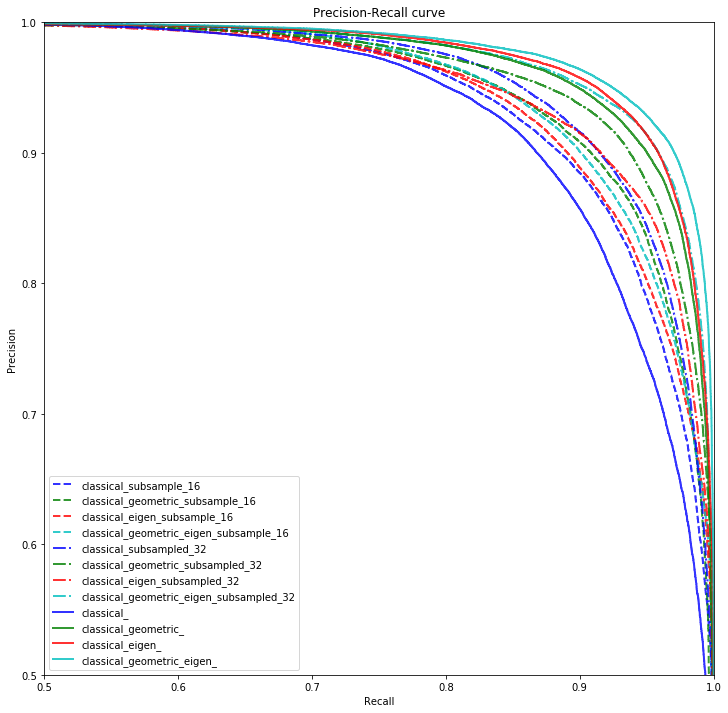

In [16]:
# In matplotlib < 1.5, plt.fill_between does not have a 'step' argument
plt.figure(figsize=(12,12))
legend_list = []
color_list = ['b', 'g', 'r', 'c']
n_16 = 0
n_32 = 0
n_64 = 0
for k in front_recall_scores:
    if '16' in k:
        legend_list.append(k)
        plt.step(front_prec_scores[k], front_recall_scores[k], linewidth=2, linestyle='--', color=color_list[n_16], alpha=0.8, where='post')
        n_16 += 1
        
    if '32' in k:
        legend_list.append(k)
        plt.step(front_prec_scores[k], front_recall_scores[k], linewidth=2, linestyle='-.', color=color_list[n_32], alpha=0.8, where='post')
        n_32 += 1
    
    if '16' not in k and '32' not in k:
        legend_list.append(k)
        plt.step(front_prec_scores[k], front_recall_scores[k], linewidth=2, linestyle='-', color=color_list[n_64], alpha=0.8, where='post')
        n_64 += 1
#       plt.step(prec_scores[k], recall_scores[k], linewidth=2, color='xkcd:purple', alpha=0.8, where='post')
# plt.step(rec_c_g, prec_c_g, linewidth=2, color='xkcd:green', alpha=0.8, where='post')

# plt.step(rec_c_s_32, prec_c_s_32, linewidth=2, color='xkcd:blue', alpha=0.8, where='post')
# plt.step(rec_c_g_s_32, prec_c_g_s_32, linewidth=2, color='xkcd:brown', alpha=0.8, where='post')

# plt.step(rec_c_s_16, prec_c_s_16, linewidth=2, color='xkcd:red', alpha=0.8, where='post')
# plt.step(rec_c_g_s_16, prec_c_g_s_16, linewidth=2, color='xkcd:teal', alpha=0.8, where='post')
# plt.step(rec_c_g_s, prec_c_g_s, linewidth=2, color='xkcd:orange', alpha=0.8, where='post')
# plt.step(rec_c_g_s_h, prec_c_g_s_h, linewidth=2, color='xkcd:goldenrod', alpha=0.8, where='post')


plt.xlabel('Recall')
plt.ylabel('Precision')
plt.ylim([0.5, 1.0])
plt.xlim([0.5, 1.0])
plt.title('Precision-Recall curve')
plt.legend(legend_list, loc=3)